In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint, gauss
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
set1 = cm.get_cmap(plt.get_cmap('Set1'))
tab20 = cm.get_cmap(plt.get_cmap('tab20'))

def tableau20(color):
    # Use coordinated colors. These are the "Tableau 20" colors as
    # RGB. Each pair is strong/light. For a theory of color
    tableau20 = [(31 , 119, 180), (174, 199, 232), # blue        [ 0,1 ]
                 (255, 127, 14 ), (255, 187, 120), # orange      [ 2,3 ]
                 (44 , 160, 44 ), (152, 223, 138), # green       [ 4,5 ]
                 (214, 39 , 40 ), (255, 152, 150), # red         [ 6,7 ]
                 (148, 103, 189), (197, 176, 213), # purple      [ 8,9 ]
                 (140, 86 , 75 ), (196, 156, 148), # brown       [10,11]
                 (227, 119, 194), (247, 182, 210), # pink        [12,13]
                 (188, 189, 34 ), (219, 219, 141), # yellow      [14,15]
                 (23 , 190, 207), (158, 218, 229), # cyan        [16,17]
                 (65 , 68 , 81 ), (96 , 99 , 106), # gray        [18,19]
                 (127, 127, 127), (143, 135, 130), # gray        [20,21]
                 (165, 172, 175), (199, 199, 199), # gray        [22,23]
                 (207, 207, 207)]                   # gray        [24]
    # Scale the RGB values to the [0, 1] range, which is the format
    # matplotlib accepts.
    r, g, b = tableau20[color]
    return (round(r/255.,1), round(g/255.,1), round(b/255.,1))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
StHomoCampaigns_4DynHomoResourcesHEFT = pd.read_csv('../Data/heft/StHomoCampaigns_4DynHomoResourcesHEFT_new.csv')
StHomoCampaigns_4DynHomoResourcesL2FF = pd.read_csv('../Data/l2ff/StHomoCampaigns_4DynHomoResourcesL2FF_new.csv')
StHomoCampaigns_4DynHomoResourcesGA00 = pd.read_csv('../Data/ga/perc_100/StHomoCampaigns_4DynHomoResourcesGA00_new.csv')
StHomoCampaigns_4DynHomoResourcesGA25 = pd.read_csv('../Data/ga/perc_075/StHomoCampaigns_4DynHomoResourcesGA25_new.csv')
StHomoCampaigns_4DynHomoResourcesGA50 = pd.read_csv('../Data/ga/perc_050/StHomoCampaigns_4DynHomoResourcesGA50_new.csv')
StHomoCampaigns_4DynHomoResourcesRAND = pd.read_csv('../Data/random/StHomoCampaigns_4DynHomoResourcesRAND_new.csv')

StHomoCampaigns_4DynHomoResourcesHEFT['mpn_snt_norm'] = StHomoCampaigns_4DynHomoResourcesHEFT['mpn_snt'] / StHomoCampaigns_4DynHomoResourcesHEFT['expected']
StHomoCampaigns_4DynHomoResourcesL2FF['mpn_snt_norm'] = StHomoCampaigns_4DynHomoResourcesL2FF['mpn_snt'] / StHomoCampaigns_4DynHomoResourcesL2FF['expected']
StHomoCampaigns_4DynHomoResourcesGA50['mpn_snt_norm'] = StHomoCampaigns_4DynHomoResourcesGA50['mpn_snt'] / StHomoCampaigns_4DynHomoResourcesGA50['expected']
StHomoCampaigns_4DynHomoResourcesRAND['mpn_snt_norm'] = StHomoCampaigns_4DynHomoResourcesRAND['mpn_snt'] / StHomoCampaigns_4DynHomoResourcesRAND['expected']

StHomoCampaigns_4DynHomoResourcesHEFT = StHomoCampaigns_4DynHomoResourcesHEFT.groupby(by=['size'])
StHomoCampaigns_4DynHomoResourcesHEFT_means = StHomoCampaigns_4DynHomoResourcesHEFT.mean()
StHomoCampaigns_4DynHomoResourcesHEFT_stds = StHomoCampaigns_4DynHomoResourcesHEFT.std()
StHomoCampaigns_4DynHomoResourcesL2FF = StHomoCampaigns_4DynHomoResourcesL2FF.groupby(by=['size'])
StHomoCampaigns_4DynHomoResourcesL2FF_means = StHomoCampaigns_4DynHomoResourcesL2FF.mean()
StHomoCampaigns_4DynHomoResourcesL2FF_stds = StHomoCampaigns_4DynHomoResourcesL2FF.std()
StHomoCampaigns_4DynHomoResourcesGA00 = StHomoCampaigns_4DynHomoResourcesGA00.groupby(by=['size'])
StHomoCampaigns_4DynHomoResourcesGA00_means = StHomoCampaigns_4DynHomoResourcesGA00.mean()
StHomoCampaigns_4DynHomoResourcesGA00_stds = StHomoCampaigns_4DynHomoResourcesGA00.std()
StHomoCampaigns_4DynHomoResourcesGA25 = StHomoCampaigns_4DynHomoResourcesGA25.groupby(by=['size'])
StHomoCampaigns_4DynHomoResourcesGA25_means = StHomoCampaigns_4DynHomoResourcesGA25.mean()
StHomoCampaigns_4DynHomoResourcesGA25_stds = StHomoCampaigns_4DynHomoResourcesGA25.std()
StHomoCampaigns_4DynHomoResourcesGA50 = StHomoCampaigns_4DynHomoResourcesGA50.groupby(by=['size'])
StHomoCampaigns_4DynHomoResourcesGA50_means = StHomoCampaigns_4DynHomoResourcesGA50.mean()
StHomoCampaigns_4DynHomoResourcesGA50_stds = StHomoCampaigns_4DynHomoResourcesGA50.std()
StHomoCampaigns_4DynHomoResourcesRAND = StHomoCampaigns_4DynHomoResourcesRAND.groupby(by=['size'])
StHomoCampaigns_4DynHomoResourcesRAND_means = StHomoCampaigns_4DynHomoResourcesRAND.mean()
StHomoCampaigns_4DynHomoResourcesRAND_stds = StHomoCampaigns_4DynHomoResourcesRAND.std()

In [3]:
DiffStHomoCamp_4StHomoResGA = abs(StHomoCampaigns_4DynHomoResourcesRAND_means['expected'].values - StHomoCampaigns_4DynHomoResourcesGA00_means['expected'].values)
DiffStHomoCamp_4StHomoResGA25 = abs( StHomoCampaigns_4DynHomoResourcesRAND_means['expected'].values - StHomoCampaigns_4DynHomoResourcesGA25_means['expected'].values)
DiffStHomoCamp_4StHomoResGA50 = abs( StHomoCampaigns_4DynHomoResourcesRAND_means['expected'].values - StHomoCampaigns_4DynHomoResourcesGA50_means['expected'].values)

In [4]:
DiffStHomoCamp_4StHomoResGA / StHomoCampaigns_4DynHomoResourcesRAND_means['expected'].values

array([0.47619048, 0.28285714, 0.23954984, 0.1707989 , 0.13396414,
       0.0994152 , 0.08064516, 0.05450509, 0.03947465, 0.02945736])

In [5]:
DiffStHomoCamp_4StHomoResGA25 / StHomoCampaigns_4DynHomoResourcesRAND_means['expected'].values

array([0.52380952, 0.42571429, 0.35209003, 0.26538108, 0.20318725,
       0.14938862, 0.11772815, 0.0832259 , 0.06082618, 0.04361633])

In [6]:
DiffStHomoCamp_4StHomoResGA50 / StHomoCampaigns_4DynHomoResourcesRAND_means['expected'].values

array([0.52380952, 0.42857143, 0.35691318, 0.26538108, 0.20318725,
       0.14938862, 0.11772815, 0.0832259 , 0.06082618, 0.04361633])

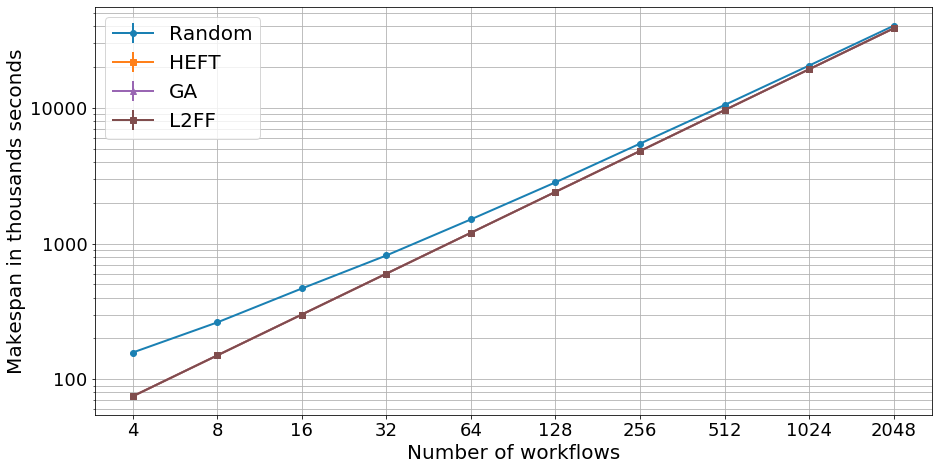

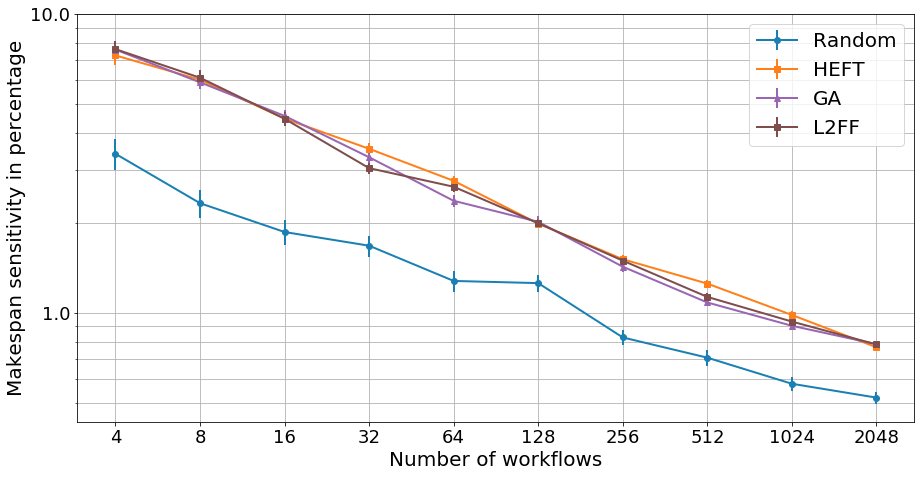

In [7]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHomoCampaigns_4DynHomoResourcesRAND_means.index, StHomoCampaigns_4DynHomoResourcesRAND_means['expected'].values, StHomoCampaigns_4DynHomoResourcesRAND_stds['expected'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResourcesHEFT_means.index, StHomoCampaigns_4DynHomoResourcesHEFT_means['expected'].values, StHomoCampaigns_4DynHomoResourcesHEFT_stds['expected'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(StHomoCampaigns_4DynHomoResourcesGA50_means.index, StHomoCampaigns_4DynHomoResourcesGA00_means['expected'].values, StHomoCampaigns_4DynHomoResourcesGA00_stds['expected'].values / 10, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(StHomoCampaigns_4DynHomoResourcesGA50_means.index, StHomoCampaigns_4DynHomoResourcesGA25_means['expected'].values, StHomoCampaigns_4DynHomoResourcesGA25_stds['expected'].values / 10, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResourcesGA50_means.index, StHomoCampaigns_4DynHomoResourcesGA50_means['expected'].values, StHomoCampaigns_4DynHomoResourcesGA50_stds['expected'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResourcesL2FF_means.index, StHomoCampaigns_4DynHomoResourcesL2FF_means['expected'].values, StHomoCampaigns_4DynHomoResourcesL2FF_stds['expected'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/Experiment1/StHomoCampaigns_4StHomoResources.pdf',bbox_inches='tight')
_ = fig.savefig('../Figures/Experiment1/StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHomoCampaigns_4DynHomoResourcesRAND_means.index, StHomoCampaigns_4DynHomoResourcesRAND_means['mpn_snt_norm'].values, StHomoCampaigns_4DynHomoResourcesRAND_stds['mpn_snt_norm'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResourcesHEFT_means.index, StHomoCampaigns_4DynHomoResourcesHEFT_means['mpn_snt_norm'].values, StHomoCampaigns_4DynHomoResourcesHEFT_stds['mpn_snt_norm'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResourcesGA50_means.index, StHomoCampaigns_4DynHomoResourcesGA50_means['mpn_snt_norm'].values, StHomoCampaigns_4DynHomoResourcesGA50_stds['mpn_snt_norm'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResourcesL2FF_means.index, StHomoCampaigns_4DynHomoResourcesL2FF_means['mpn_snt_norm'].values, StHomoCampaigns_4DynHomoResourcesL2FF_stds['mpn_snt_norm'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_yticks([0.01,0.1])
_ = axis.set_ylabel('Makespan sensitivity in percentage',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks() * 100,fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/Experiment2/StHomoCampaigns_4DynHomoResourcesSens.pdf',bbox_inches='tight')
_ = fig.savefig('../Figures/Experiment2/StHomoCampaigns_4DynHomoResourcesSens.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

In [8]:
DynHomoResources_StHomoCampaignsHEFT = pd.read_csv('../Data/heft/DynHomoResources_StHomoCampaignsHEFT_new.csv')


In [9]:
DynHomoResources_StHomoCampaignsHEFT = pd.read_csv('../Data/heft/DynHomoResources_StHomoCampaignsHEFT_new.csv')
DynHomoResources_StHomoCampaignsL2FF = pd.read_csv('../Data/l2ff/DynHomoResources_StHomoCampaignsL2FF_new.csv')
DynHomoResources_StHomoCampaignsGA00 = pd.read_csv('../Data/ga/perc_100/DynHomoResources_StHomoCampaignsGA00_new.csv')
DynHomoResources_StHomoCampaignsGA25 = pd.read_csv('../Data/ga/perc_075/DynHomoResources_StHomoCampaignsGA25_new.csv')
DynHomoResources_StHomoCampaignsGA50 = pd.read_csv('../Data/ga/perc_050/DynHomoResources_StHomoCampaignsGA50_new.csv')
DynHomoResources_StHomoCampaignsRAND = pd.read_csv('../Data/random/DynHomoResources_StHomoCampaignsRAND_new.csv')

DynHomoResources_StHomoCampaignsHEFT['mpn_snt_norm'] = DynHomoResources_StHomoCampaignsHEFT['mpn_snt'] / DynHomoResources_StHomoCampaignsHEFT['expected']
DynHomoResources_StHomoCampaignsL2FF['mpn_snt_norm'] = DynHomoResources_StHomoCampaignsL2FF['mpn_snt'] / DynHomoResources_StHomoCampaignsL2FF['expected']
DynHomoResources_StHomoCampaignsGA50['mpn_snt_norm'] = DynHomoResources_StHomoCampaignsGA50['mpn_snt'] / DynHomoResources_StHomoCampaignsGA50['expected']
DynHomoResources_StHomoCampaignsRAND['mpn_snt_norm'] = DynHomoResources_StHomoCampaignsRAND['mpn_snt'] / DynHomoResources_StHomoCampaignsRAND['expected']

DynHomoResources_StHomoCampaignsHEFT = DynHomoResources_StHomoCampaignsHEFT.groupby(by=['size'])
DynHomoResources_StHomoCampaignsHEFT_means = DynHomoResources_StHomoCampaignsHEFT.mean()
DynHomoResources_StHomoCampaignsHEFT_stds = DynHomoResources_StHomoCampaignsHEFT.std()
DynHomoResources_StHomoCampaignsL2FF = DynHomoResources_StHomoCampaignsL2FF.groupby(by=['size'])
DynHomoResources_StHomoCampaignsL2FF_means = DynHomoResources_StHomoCampaignsL2FF.mean()
DynHomoResources_StHomoCampaignsL2FF_stds = DynHomoResources_StHomoCampaignsL2FF.std()

DynHomoResources_StHomoCampaignsGA00 = DynHomoResources_StHomoCampaignsGA00.groupby(by=['size'])
DynHomoResources_StHomoCampaignsGA00_means = DynHomoResources_StHomoCampaignsGA00.mean()
DynHomoResources_StHomoCampaignsGA00_stds = DynHomoResources_StHomoCampaignsGA00.std()

DynHomoResources_StHomoCampaignsGA25 = DynHomoResources_StHomoCampaignsGA25.groupby(by=['size'])
DynHomoResources_StHomoCampaignsGA25_means = DynHomoResources_StHomoCampaignsGA25.mean()
DynHomoResources_StHomoCampaignsGA25_stds = DynHomoResources_StHomoCampaignsGA25.std()

DynHomoResources_StHomoCampaignsGA50 = DynHomoResources_StHomoCampaignsGA50.groupby(by=['size'])
DynHomoResources_StHomoCampaignsGA50_means = DynHomoResources_StHomoCampaignsGA50.mean()
DynHomoResources_StHomoCampaignsGA50_stds = DynHomoResources_StHomoCampaignsGA50.std()

DynHomoResources_StHomoCampaignsRAND = DynHomoResources_StHomoCampaignsRAND.groupby(by=['size'])
DynHomoResources_StHomoCampaignsRAND_means = DynHomoResources_StHomoCampaignsRAND.mean()
DynHomoResources_StHomoCampaignsRAND_stds = DynHomoResources_StHomoCampaignsRAND.std()

In [10]:
DiffStHomoCamp_4StHomoResGA = abs(DynHomoResources_StHomoCampaignsRAND_means['expected'].values - DynHomoResources_StHomoCampaignsGA00_means['expected'].values)
DiffStHomoCamp_4StHomoResGA25 = abs(DynHomoResources_StHomoCampaignsRAND_means['expected'].values - DynHomoResources_StHomoCampaignsGA25_means['expected'].values)
DiffStHomoCamp_4StHomoResGA50 = abs(DynHomoResources_StHomoCampaignsRAND_means['expected'].values - DynHomoResources_StHomoCampaignsGA50_means['expected'].values)

In [11]:
DiffStHomoCamp_4StHomoResGA / DynHomoResources_StHomoCampaignsRAND_means['expected'].values

array([0.03676146, 0.05903881, 0.0658713 , 0.06856755, 0.07164751,
       0.07730365, 0.05953488])

In [12]:
DiffStHomoCamp_4StHomoResGA25 / DynHomoResources_StHomoCampaignsRAND_means['expected'].values

array([0.05702078, 0.11614418, 0.18771418, 0.2640869 , 0.28084291,
       0.25664811, 0.22790698])

In [13]:
DiffStHomoCamp_4StHomoResGA50 / DynHomoResources_StHomoCampaignsRAND_means['expected'].values

array([0.05702078, 0.11614418, 0.18771418, 0.27585427, 0.38697318,
       0.44094001, 0.42697674])

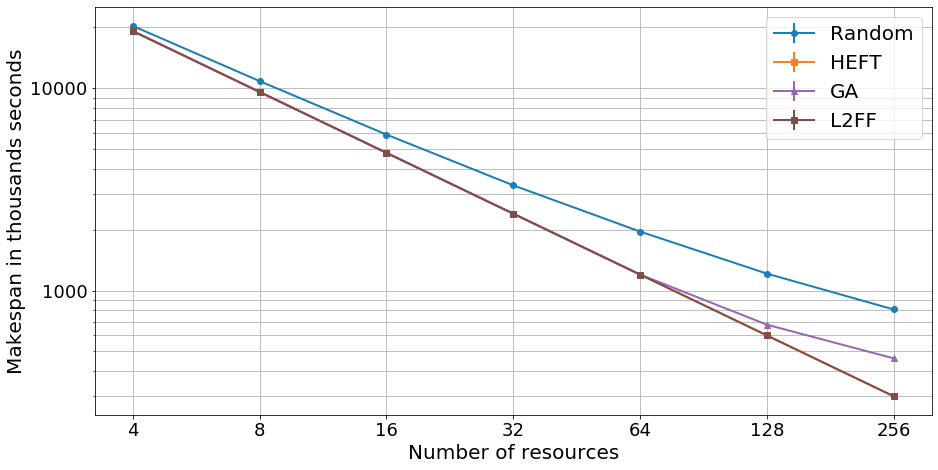

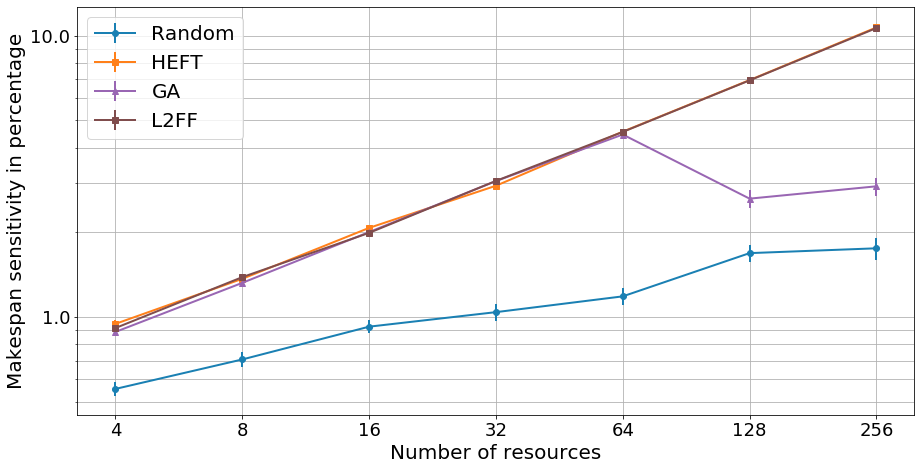

In [14]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(DynHomoResources_StHomoCampaignsRAND_means.index, DynHomoResources_StHomoCampaignsRAND_means['expected'].values, DynHomoResources_StHomoCampaignsRAND_stds['expected'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHomoCampaignsHEFT_means.index, DynHomoResources_StHomoCampaignsHEFT_means['expected'].values, DynHomoResources_StHomoCampaignsHEFT_stds['expected'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(DynHomoResources_StHomoCampaignsGA50_means.index, DynHomoResources_StHomoCampaignsGA00_means['expected'].values, DynHomoResources_StHomoCampaignsGA00_stds['expected'].values / 10, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(DynHomoResources_StHomoCampaignsGA50_means.index, DynHomoResources_StHomoCampaignsGA25_means['expected'].values, DynHomoResources_StHomoCampaignsGA25_stds['expected'].values / 10, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHomoCampaignsGA50_means.index, DynHomoResources_StHomoCampaignsGA50_means['expected'].values, DynHomoResources_StHomoCampaignsGA50_stds['expected'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHomoCampaignsL2FF_means.index, DynHomoResources_StHomoCampaignsL2FF_means['expected'].values, DynHomoResources_StHomoCampaignsL2FF_stds['expected'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/Experiment1/StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')
_ = fig.savefig('../Figures/Experiment1/StHomoResources_StHomoCampaigns.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(DynHomoResources_StHomoCampaignsRAND_means.index, DynHomoResources_StHomoCampaignsRAND_means['mpn_snt_norm'].values, DynHomoResources_StHomoCampaignsRAND_stds['mpn_snt_norm'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHomoCampaignsHEFT_means.index, DynHomoResources_StHomoCampaignsHEFT_means['mpn_snt_norm'].values, DynHomoResources_StHomoCampaignsHEFT_stds['mpn_snt_norm'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis.errorbar(DynHomoResources_StHomoCampaignsGA50_means.index, DynHomoResources_StHomoCampaignsGA50_means['mpn_snt_norm'].values, DynHomoResources_StHomoCampaignsGA50_stds['mpn_snt_norm'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHomoCampaignsL2FF_means.index, DynHomoResources_StHomoCampaignsL2FF_means['mpn_snt_norm'].values, DynHomoResources_StHomoCampaignsL2FF_stds['mpn_snt_norm'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_yticks([0.01,0.1])
_ = axis.set_ylabel('Makespan sensitivity in percentage',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks() * 100,fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/Experiment2/DynHomoResources_StHomoCampaignsSens.pdf',bbox_inches='tight')
_ = fig.savefig('../Figures/Experiment2/DynHomoResources_StHomoCampaignsSens.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

In [15]:
StHomoCampaigns_4DynHeteroResourcesHEFT = pd.read_csv('../Data/heft/StHomoCampaigns_4DynHeteroResourcesHEFT_new.csv')
StHomoCampaigns_4DynHeteroResourcesL2FF = pd.read_csv('../Data/l2ff/StHomoCampaigns_4DynHeteroResourcesL2FF_new.csv')
StHomoCampaigns_4DynHeteroResourcesGA50 = pd.read_csv('../Data/ga/perc_050/StHomoCampaigns_4DynHeteroResourcesGA50_new.csv')
StHomoCampaigns_4DynHeteroResourcesRAND = pd.read_csv('../Data/random/StHomoCampaigns_4DynHeteroResourcesRAND_new.csv')

StHomoCampaigns_4DynHeteroResourcesHEFT['mpn_snt_norm'] = StHomoCampaigns_4DynHeteroResourcesHEFT['mpn_snt'] / StHomoCampaigns_4DynHeteroResourcesHEFT['expected']
StHomoCampaigns_4DynHeteroResourcesL2FF['mpn_snt_norm'] = StHomoCampaigns_4DynHeteroResourcesL2FF['mpn_snt'] / StHomoCampaigns_4DynHeteroResourcesL2FF['expected']
StHomoCampaigns_4DynHeteroResourcesGA50['mpn_snt_norm'] = StHomoCampaigns_4DynHeteroResourcesGA50['mpn_snt'] / StHomoCampaigns_4DynHeteroResourcesGA50['expected']
StHomoCampaigns_4DynHeteroResourcesRAND['mpn_snt_norm'] = StHomoCampaigns_4DynHeteroResourcesRAND['mpn_snt'] / StHomoCampaigns_4DynHeteroResourcesRAND['expected']

StHomoCampaigns_4DynHeteroResourcesHEFT = StHomoCampaigns_4DynHeteroResourcesHEFT.groupby(by=['size'])
StHomoCampaigns_4DynHeteroResourcesHEFT_means = StHomoCampaigns_4DynHeteroResourcesHEFT.mean()
StHomoCampaigns_4DynHeteroResourcesHEFT_stds = StHomoCampaigns_4DynHeteroResourcesHEFT.std()
StHomoCampaigns_4DynHeteroResourcesL2FF = StHomoCampaigns_4DynHeteroResourcesL2FF.groupby(by=['size'])
StHomoCampaigns_4DynHeteroResourcesL2FF_means = StHomoCampaigns_4DynHeteroResourcesL2FF.mean()
StHomoCampaigns_4DynHeteroResourcesL2FF_stds = StHomoCampaigns_4DynHeteroResourcesL2FF.std()
StHomoCampaigns_4DynHeteroResourcesGA50 = StHomoCampaigns_4DynHeteroResourcesGA50.groupby(by=['size'])
StHomoCampaigns_4DynHeteroResourcesGA50_means = StHomoCampaigns_4DynHeteroResourcesGA50.mean()
StHomoCampaigns_4DynHeteroResourcesGA50_stds = StHomoCampaigns_4DynHeteroResourcesGA50.std()
StHomoCampaigns_4DynHeteroResourcesRAND = StHomoCampaigns_4DynHeteroResourcesRAND.groupby(by=['size'])
StHomoCampaigns_4DynHeteroResourcesRAND_means = StHomoCampaigns_4DynHeteroResourcesRAND.mean()
StHomoCampaigns_4DynHeteroResourcesRAND_stds = StHomoCampaigns_4DynHeteroResourcesRAND.std()

In [16]:
StHomoCampaigns_4DynHeteroResourcesHEFT = pd.read_csv('../Data/heft/StHomoCampaigns_4DynHeteroResourcesHEFT_new.csv')
plan = eval(StHomoCampaigns_4DynHeteroResourcesHEFT.loc[0]['plan'])
plan

[({'description': None, 'id': 1, 'num_oper': 75000},
  {'id': 4, 'performance': 23.516},
  0,
  3189.3179112093894),
 ({'description': None, 'id': 2, 'num_oper': 75000},
  {'id': 4, 'performance': 23.516},
  3189.3179112093894,
  6378.635822418779),
 ({'description': None, 'id': 3, 'num_oper': 75000},
  {'id': 3, 'performance': 10.68},
  0,
  7022.47191011236),
 ({'description': None, 'id': 4, 'num_oper': 75000},
  {'id': 4, 'performance': 23.516},
  6378.635822418779,
  9567.953733628168)]

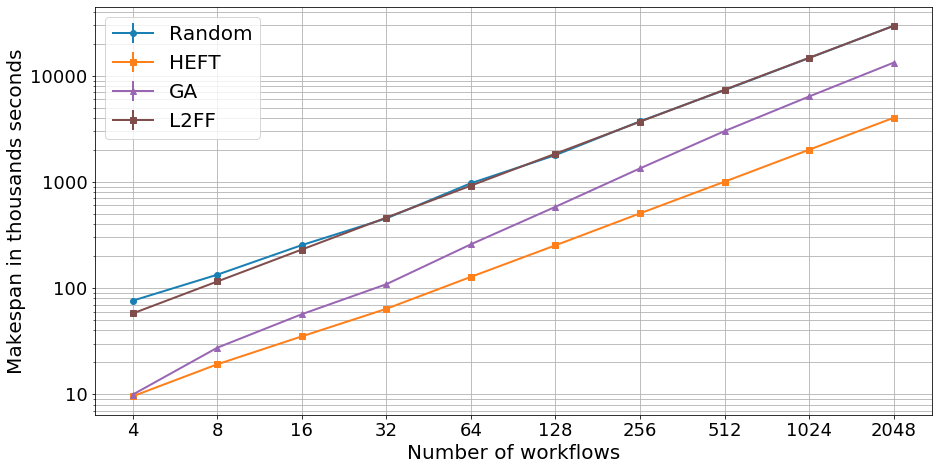

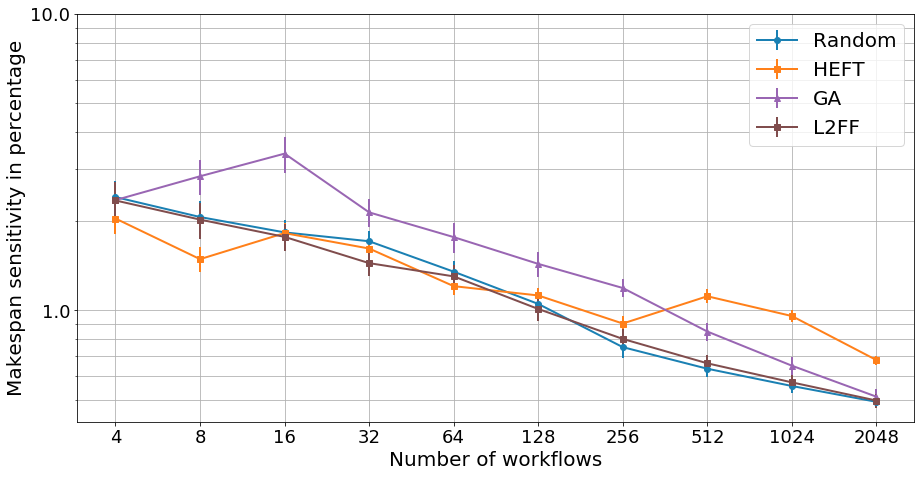

In [17]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHomoCampaigns_4DynHeteroResourcesRAND_means.index, StHomoCampaigns_4DynHeteroResourcesRAND_means['expected'].values, StHomoCampaigns_4DynHeteroResourcesRAND_stds['expected'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHeteroResourcesHEFT_means.index, StHomoCampaigns_4DynHeteroResourcesHEFT_means['expected'].values, StHomoCampaigns_4DynHeteroResourcesHEFT_stds['expected'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHeteroResourcesGA50_means.index, StHomoCampaigns_4DynHeteroResourcesGA50_means['expected'].values, StHomoCampaigns_4DynHeteroResourcesGA50_stds['expected'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHeteroResourcesL2FF_means.index, StHomoCampaigns_4DynHeteroResourcesL2FF_means['expected'].values, StHomoCampaigns_4DynHeteroResourcesL2FF_stds['expected'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/Experiment1/StHomoCampaigns_4StHeteroResources.pdf',bbox_inches='tight')
_ = fig.savefig('../Figures/Experiment1/StHomoCampaigns_4StHeteroResources.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHomoCampaigns_4DynHeteroResourcesRAND_means.index, StHomoCampaigns_4DynHeteroResourcesRAND_means['mpn_snt_norm'].values, StHomoCampaigns_4DynHeteroResourcesRAND_stds['mpn_snt_norm'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHeteroResourcesHEFT_means.index, StHomoCampaigns_4DynHeteroResourcesHEFT_means['mpn_snt_norm'].values, StHomoCampaigns_4DynHeteroResourcesHEFT_stds['mpn_snt_norm'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHeteroResourcesGA50_means.index, StHomoCampaigns_4DynHeteroResourcesGA50_means['mpn_snt_norm'].values, StHomoCampaigns_4DynHeteroResourcesGA50_stds['mpn_snt_norm'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHeteroResourcesL2FF_means.index, StHomoCampaigns_4DynHeteroResourcesL2FF_means['mpn_snt_norm'].values, StHomoCampaigns_4DynHeteroResourcesL2FF_stds['mpn_snt_norm'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_yticks([0.01,0.1])
_ = axis.set_ylabel('Makespan sensitivity in percentage',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks() * 100,fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/Experiment2/StHomoCampaigns_4DynHeteroResourcesSens.pdf',bbox_inches='tight')
_ = fig.savefig('../Figures/Experiment2/StHomoCampaigns_4DynHeteroResourcesSens.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

In [18]:
DynHeteroResources_StHomoCampaignsHEFT = pd.read_csv('../Data/heft/DynHeteroResources_StHomoCampaignsHEFT_new.csv')
DynHeteroResources_StHomoCampaignsL2FF = pd.read_csv('../Data/l2ff/DynHeteroResources_StHomoCampaignsL2FF_new.csv')
DynHeteroResources_StHomoCampaignsGA50 = pd.read_csv('../Data/ga/perc_050/DynHeteroResources_StHomoCampaignsGA50_new.csv')
DynHeteroResources_StHomoCampaignsRAND = pd.read_csv('../Data/random/DynHeteroResources_StHomoCampaignsRAND_new.csv')

DynHeteroResources_StHomoCampaignsHEFT['mpn_snt_norm'] = DynHeteroResources_StHomoCampaignsHEFT['mpn_snt'] / DynHeteroResources_StHomoCampaignsHEFT['expected']
DynHeteroResources_StHomoCampaignsL2FF['mpn_snt_norm'] = DynHeteroResources_StHomoCampaignsL2FF['mpn_snt'] / DynHeteroResources_StHomoCampaignsL2FF['expected']
DynHeteroResources_StHomoCampaignsGA50['mpn_snt_norm'] = DynHeteroResources_StHomoCampaignsGA50['mpn_snt'] / DynHeteroResources_StHomoCampaignsGA50['expected']
DynHeteroResources_StHomoCampaignsRAND['mpn_snt_norm'] = DynHeteroResources_StHomoCampaignsRAND['mpn_snt'] / DynHeteroResources_StHomoCampaignsRAND['expected']

DynHeteroResources_StHomoCampaignsHEFT = DynHeteroResources_StHomoCampaignsHEFT.groupby(by=['size'])
DynHeteroResources_StHomoCampaignsHEFT_means = DynHeteroResources_StHomoCampaignsHEFT.mean()
DynHeteroResources_StHomoCampaignsHEFT_stds = DynHeteroResources_StHomoCampaignsHEFT.std()
DynHeteroResources_StHomoCampaignsL2FF = DynHeteroResources_StHomoCampaignsL2FF.groupby(by=['size'])
DynHeteroResources_StHomoCampaignsL2FF_means = DynHeteroResources_StHomoCampaignsL2FF.mean()
DynHeteroResources_StHomoCampaignsL2FF_stds = DynHeteroResources_StHomoCampaignsL2FF.std()
DynHeteroResources_StHomoCampaignsGA50 = DynHeteroResources_StHomoCampaignsGA50.groupby(by=['size'])
DynHeteroResources_StHomoCampaignsGA50_means = DynHeteroResources_StHomoCampaignsGA50.mean()
DynHeteroResources_StHomoCampaignsGA50_stds = DynHeteroResources_StHomoCampaignsGA50.std()
DynHeteroResources_StHomoCampaignsRAND = DynHeteroResources_StHomoCampaignsRAND.groupby(by=['size'])
DynHeteroResources_StHomoCampaignsRAND_means = DynHeteroResources_StHomoCampaignsRAND.mean()
DynHeteroResources_StHomoCampaignsRAND_stds = DynHeteroResources_StHomoCampaignsRAND.std()

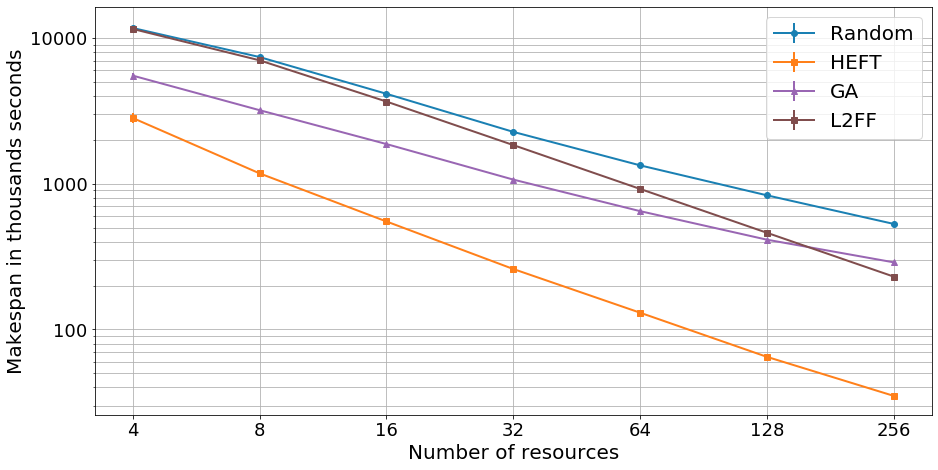

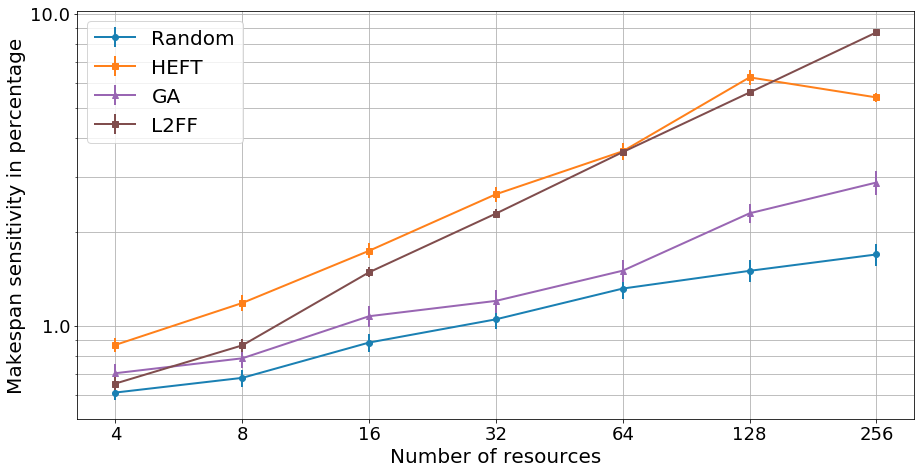

In [19]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(DynHeteroResources_StHomoCampaignsRAND_means.index, DynHeteroResources_StHomoCampaignsRAND_means['expected'].values, DynHeteroResources_StHomoCampaignsRAND_stds['expected'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHomoCampaignsHEFT_means.index, DynHeteroResources_StHomoCampaignsHEFT_means['expected'].values, DynHeteroResources_StHomoCampaignsHEFT_stds['expected'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHomoCampaignsGA50_means.index, DynHeteroResources_StHomoCampaignsGA50_means['expected'].values, DynHeteroResources_StHomoCampaignsGA50_stds['expected'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHomoCampaignsL2FF_means.index, DynHeteroResources_StHomoCampaignsL2FF_means['expected'].values, DynHeteroResources_StHomoCampaignsL2FF_stds['expected'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/Experiment1/StHeteroResources_StHomoCampaigns.pdf',bbox_inches='tight')
_ = fig.savefig('../Figures/Experiment1/StHeteroResources_StHomoCampaigns.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(DynHeteroResources_StHomoCampaignsRAND_means.index, DynHeteroResources_StHomoCampaignsRAND_means['mpn_snt_norm'].values, DynHeteroResources_StHomoCampaignsRAND_stds['mpn_snt_norm'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHomoCampaignsHEFT_means.index, DynHeteroResources_StHomoCampaignsHEFT_means['mpn_snt_norm'].values, DynHeteroResources_StHomoCampaignsHEFT_stds['mpn_snt_norm'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHomoCampaignsGA50_means.index, DynHeteroResources_StHomoCampaignsGA50_means['mpn_snt_norm'].values, DynHeteroResources_StHomoCampaignsGA50_stds['mpn_snt_norm'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHomoCampaignsL2FF_means.index, DynHeteroResources_StHomoCampaignsL2FF_means['mpn_snt_norm'].values, DynHeteroResources_StHomoCampaignsL2FF_stds['mpn_snt_norm'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_yticks([0.01,0.1])
_ = axis.set_ylabel('Makespan sensitivity in percentage',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks() * 100,fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/Experiment2/DynHeteroResources_StHomoCampaignsSens.pdf',bbox_inches='tight')
_ = fig.savefig('../Figures/Experiment2/DynHeteroResources_StHomoCampaignsSens.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

In [8]:
StHeteroCampaigns_4DynHeteroResourcesHEFT = pd.read_csv('../Data/heft/StHeteroCampaigns_4DynHeteroResourcesHEFT_new.csv')
StHeteroCampaigns_4DynHeteroResourcesL2FF = pd.read_csv('../Data/l2ff/StHeteroCampaigns_4DynHeteroResourcesL2FF_new.csv')
StHeteroCampaigns_4DynHeteroResourcesGA50 = pd.read_csv('../Data/ga/perc_050/StHeteroCampaigns_4DynHeteroResourcesGA50_new.csv')
StHeteroCampaigns_4DynHeteroResourcesRAND = pd.read_csv('../Data/random/StHeteroCampaigns_4DynHeteroResourcesRAND_new.csv')

StHeteroCampaigns_4DynHeteroResourcesHEFT['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesHEFT['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesHEFT['expected']
StHeteroCampaigns_4DynHeteroResourcesL2FF['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesL2FF['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesL2FF['expected']
StHeteroCampaigns_4DynHeteroResourcesGA50['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesGA50['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesGA50['expected']
StHeteroCampaigns_4DynHeteroResourcesRAND['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesRAND['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesRAND['expected']

StHeteroCampaigns_4DynHeteroResourcesHEFT = StHeteroCampaigns_4DynHeteroResourcesHEFT.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesHEFT_means = StHeteroCampaigns_4DynHeteroResourcesHEFT.mean()
StHeteroCampaigns_4DynHeteroResourcesHEFT_stds = StHeteroCampaigns_4DynHeteroResourcesHEFT.std()
StHeteroCampaigns_4DynHeteroResourcesL2FF = StHeteroCampaigns_4DynHeteroResourcesL2FF.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesL2FF_means = StHeteroCampaigns_4DynHeteroResourcesL2FF.mean()
StHeteroCampaigns_4DynHeteroResourcesL2FF_stds = StHeteroCampaigns_4DynHeteroResourcesL2FF.std()
StHeteroCampaigns_4DynHeteroResourcesGA50 = StHeteroCampaigns_4DynHeteroResourcesGA50.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesGA50_means = StHeteroCampaigns_4DynHeteroResourcesGA50.mean()
StHeteroCampaigns_4DynHeteroResourcesGA50_stds = StHeteroCampaigns_4DynHeteroResourcesGA50.std()
StHeteroCampaigns_4DynHeteroResourcesRAND = StHeteroCampaigns_4DynHeteroResourcesRAND.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesRAND_means = StHeteroCampaigns_4DynHeteroResourcesRAND.mean()
StHeteroCampaigns_4DynHeteroResourcesRAND_stds = StHeteroCampaigns_4DynHeteroResourcesRAND.std()


In [21]:
StHeteroCampaigns_4DynHeteroResourcesHEFT = pd.read_csv('../Data/heft/StHeteroCampaigns_4DynHeteroResourcesHEFT_new.csv')
plan = eval(StHeteroCampaigns_4DynHeteroResourcesHEFT.loc[0]['plan'])
plan

[({'description': None, 'id': 2, 'num_oper': 78295.49948313728},
  {'id': 4, 'performance': 23.516},
  0,
  3329.4565182487363),
 ({'description': None, 'id': 3, 'num_oper': 75791.44741296559},
  {'id': 4, 'performance': 23.516},
  3329.4565182487363,
  6552.430128257479),
 ({'description': None, 'id': 1, 'num_oper': 74840.3492978632},
  {'id': 3, 'performance': 10.68},
  0,
  7007.5233424965545),
 ({'description': None, 'id': 4, 'num_oper': 72498.56033952179},
  {'id': 4, 'performance': 23.516},
  6552.430128257479,
  9635.376221960567)]

In [22]:
#print('Means')
#print(HomogeResources_StHomogeCampaigns_makespan_means/1000)
#print('STD')
#print(HomogeResources_StHomogeCampaigns_makespan_stds/1000)

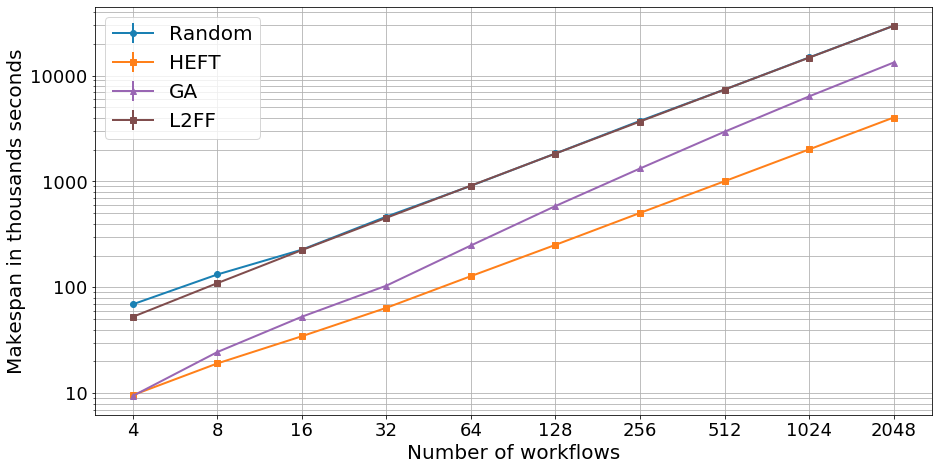

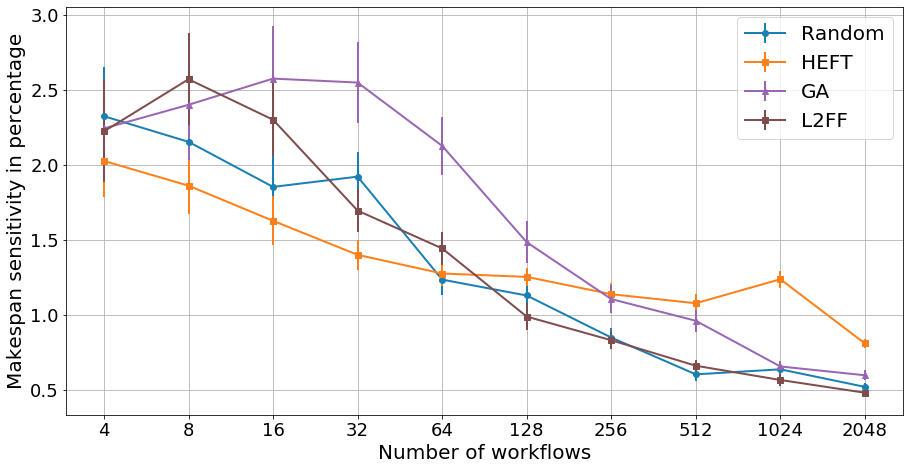

In [11]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesRAND_means.index, StHeteroCampaigns_4DynHeteroResourcesRAND_means['expected'].values, StHeteroCampaigns_4DynHeteroResourcesRAND_stds['expected'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesHEFT_means.index, StHeteroCampaigns_4DynHeteroResourcesHEFT_means['expected'].values, StHeteroCampaigns_4DynHeteroResourcesHEFT_stds['expected'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesGA50_means.index, StHeteroCampaigns_4DynHeteroResourcesGA50_means['expected'].values, StHeteroCampaigns_4DynHeteroResourcesGA50_stds['expected'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesL2FF_means.index, StHeteroCampaigns_4DynHeteroResourcesL2FF_means['expected'].values, StHeteroCampaigns_4DynHeteroResourcesL2FF_stds['expected'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
#_ = fig.savefig('../Figures/Experiment1/StHeteroCampaigns_4StHeteroResources.pdf',bbox_inches='tight')
#_ = fig.savefig('../Figures/Experiment1/StHeteroCampaigns_4StHeteroResources.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesRAND_means.index, StHeteroCampaigns_4DynHeteroResourcesRAND_means['mpn_snt_norm'].values, StHeteroCampaigns_4DynHeteroResourcesRAND_stds['mpn_snt_norm'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesHEFT_means.index, StHeteroCampaigns_4DynHeteroResourcesHEFT_means['mpn_snt_norm'].values, StHeteroCampaigns_4DynHeteroResourcesHEFT_stds['mpn_snt_norm'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesGA50_means.index, StHeteroCampaigns_4DynHeteroResourcesGA50_means['mpn_snt_norm'].values, StHeteroCampaigns_4DynHeteroResourcesGA50_stds['mpn_snt_norm'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResourcesL2FF_means.index, StHeteroCampaigns_4DynHeteroResourcesL2FF_means['mpn_snt_norm'].values, StHeteroCampaigns_4DynHeteroResourcesL2FF_stds['mpn_snt_norm'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
#_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
#_ = axis.set_yticks([0.01,0.1])
_ = axis.set_ylabel('Makespan sensitivity in percentage',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks() * 100,fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
#_ = fig.savefig('../Figures/Experiment2/StHeteroCampaigns_4DynHeteroResourcesSens.pdf',bbox_inches='tight')
_ = fig.savefig('../Figures/Experiment2/StHeteroCampaigns_4DynHeteroResourcesSens.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

In [13]:
DynHeteroResources_StHeteroCampaignsHEFT = pd.read_csv('../Data/heft/DynHeteroResources_StHeteroCampaignsHEFT_new.csv')
DynHeteroResources_StHeteroCampaignsL2FF = pd.read_csv('../Data/l2ff/DynHeteroResources_StHeteroCampaignsL2FF_new.csv')
DynHeteroResources_StHeteroCampaignsGA50 = pd.read_csv('../Data/ga/perc_050/DynHeteroResources_StHeteroCampaignsGA50_new.csv')
DynHeteroResources_StHeteroCampaignsRAND = pd.read_csv('../Data/random/DynHeteroResources_StHeteroCampaignsRAND_new.csv')

DynHeteroResources_StHeteroCampaignsHEFT['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsHEFT['mpn_snt'] / DynHeteroResources_StHeteroCampaignsHEFT['expected']
DynHeteroResources_StHeteroCampaignsL2FF['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsL2FF['mpn_snt'] / DynHeteroResources_StHeteroCampaignsL2FF['expected']
DynHeteroResources_StHeteroCampaignsGA50['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsGA50['mpn_snt'] / DynHeteroResources_StHeteroCampaignsGA50['expected']
DynHeteroResources_StHeteroCampaignsRAND['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsRAND['mpn_snt'] / DynHeteroResources_StHeteroCampaignsRAND['expected']

DynHeteroResources_StHeteroCampaignsHEFT = DynHeteroResources_StHeteroCampaignsHEFT.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsHEFT_means = DynHeteroResources_StHeteroCampaignsHEFT.mean()
DynHeteroResources_StHeteroCampaignsHEFT_stds = DynHeteroResources_StHeteroCampaignsHEFT.std()
DynHeteroResources_StHeteroCampaignsL2FF = DynHeteroResources_StHeteroCampaignsL2FF.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsL2FF_means = DynHeteroResources_StHeteroCampaignsL2FF.mean()
DynHeteroResources_StHeteroCampaignsL2FF_stds = DynHeteroResources_StHeteroCampaignsL2FF.std()
DynHeteroResources_StHeteroCampaignsGA50 = DynHeteroResources_StHeteroCampaignsGA50.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsGA50_means = DynHeteroResources_StHeteroCampaignsGA50.mean()
DynHeteroResources_StHeteroCampaignsGA50_stds = DynHeteroResources_StHeteroCampaignsGA50.std()
DynHeteroResources_StHeteroCampaignsRAND = DynHeteroResources_StHeteroCampaignsRAND.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsRAND_means = DynHeteroResources_StHeteroCampaignsRAND.mean()
DynHeteroResources_StHeteroCampaignsRAND_stds = DynHeteroResources_StHeteroCampaignsRAND.std()

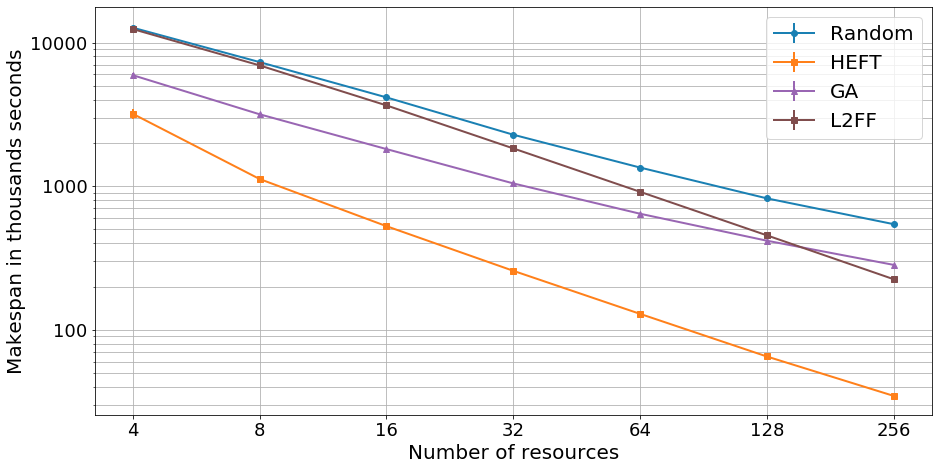

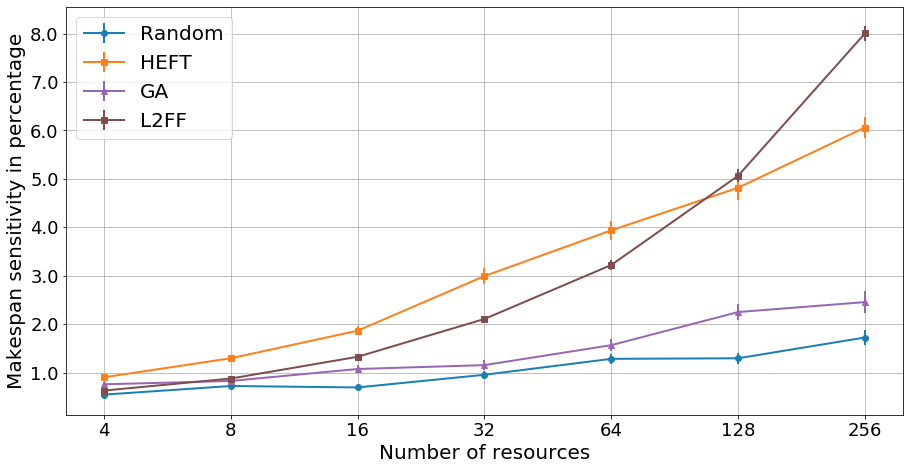

In [15]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsRAND_means.index, DynHeteroResources_StHeteroCampaignsRAND_means['expected'].values, DynHeteroResources_StHeteroCampaignsRAND_stds['expected'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsHEFT_means.index, DynHeteroResources_StHeteroCampaignsHEFT_means['expected'].values, DynHeteroResources_StHeteroCampaignsHEFT_stds['expected'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsGA50_means.index, DynHeteroResources_StHeteroCampaignsGA50_means['expected'].values, DynHeteroResources_StHeteroCampaignsGA50_stds['expected'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsL2FF_means.index, DynHeteroResources_StHeteroCampaignsL2FF_means['expected'].values, DynHeteroResources_StHeteroCampaignsL2FF_stds['expected'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
#_ = fig.savefig('../Figures/Experiment1/StHeteroResources_StHeteroCampaigns.pdf',bbox_inches='tight')
#_ = fig.savefig('../Figures/Experiment1/StHeteroResources_StHeteroCampaigns.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsRAND_means.index, DynHeteroResources_StHeteroCampaignsRAND_means['mpn_snt_norm'].values, DynHeteroResources_StHeteroCampaignsRAND_stds['mpn_snt_norm'].values / 10, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsHEFT_means.index, DynHeteroResources_StHeteroCampaignsHEFT_means['mpn_snt_norm'].values, DynHeteroResources_StHeteroCampaignsHEFT_stds['mpn_snt_norm'].values / 10, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsGA50_means.index, DynHeteroResources_StHeteroCampaignsGA50_means['mpn_snt_norm'].values, DynHeteroResources_StHeteroCampaignsGA50_stds['mpn_snt_norm'].values / 10, color=tableau20(8),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaignsL2FF_means.index, DynHeteroResources_StHeteroCampaignsL2FF_means['mpn_snt_norm'].values, DynHeteroResources_StHeteroCampaignsL2FF_stds['mpn_snt_norm'].values / 10, marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
#_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
#_ = axis.set_yticks([0.01,0.1])
_ = axis.set_ylabel('Makespan sensitivity in percentage',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(np.around(axis.get_yticks() * 100, decimals=0),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
#_ = fig.savefig('../Figures/Experiment2/DynHeteroResources_StHeteroCampaignsSens.pdf',bbox_inches='tight')
_ = fig.savefig('../Figures/Experiment2/DynHeteroResources_StHeteroCampaignsSens.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

In [ ]:
DynHeteroResources_StHeteroCampaignsHEFT = pd.read_csv('../Data/heft/DynHeteroResources_StHeteroCampaignsHEFT_new.csv')

In [ ]:
for i in range(100):
    test = DynHeteroResources_StHeteroCampaignsHEFT.loc[i]
    plan = eval(test['plan'])
    res = list()
    for placement in plan:
        res_perf = placement[1]['performance']
        if res_perf not in res:
            res.append(res_perf)
    print(res)

In [2]:
DynHeteroResources_StHeteroCampaignsHEFT_inaccur_10perc = pd.read_csv('../Data/heft/StHeteroResources_StHeteroCampaignsHEFT_inaccr10_new.csv')
DynHeteroResources_StHeteroCampaignsHEFT_inaccur_10perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsHEFT_inaccur_10perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsHEFT_inaccur_10perc['expected']
DynHeteroResources_StHeteroCampaignsHEFT_inaccur_20perc = pd.read_csv('../Data/heft/StHeteroResources_StHeteroCampaignsHEFT_inaccr20_new.csv')
DynHeteroResources_StHeteroCampaignsHEFT_inaccur_20perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsHEFT_inaccur_20perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsHEFT_inaccur_20perc['expected']
DynHeteroResources_StHeteroCampaignsHEFT_inaccur_30perc = pd.read_csv('../Data/heft/StHeteroResources_StHeteroCampaignsHEFT_inaccr30_new.csv')
DynHeteroResources_StHeteroCampaignsHEFT_inaccur_30perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsHEFT_inaccur_30perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsHEFT_inaccur_30perc['expected']
DynHeteroResources_StHeteroCampaignsHEFT_inaccur_40perc = pd.read_csv('../Data/heft/StHeteroResources_StHeteroCampaignsHEFT_inaccr40_new.csv')
DynHeteroResources_StHeteroCampaignsHEFT_inaccur_40perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsHEFT_inaccur_40perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsHEFT_inaccur_40perc['expected']
DynHeteroResources_StHeteroCampaignsHEFT_inaccur_50perc = pd.read_csv('../Data/heft/StHeteroResources_StHeteroCampaignsHEFT_inaccr50_new.csv')
DynHeteroResources_StHeteroCampaignsHEFT_inaccur_50perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsHEFT_inaccur_50perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsHEFT_inaccur_50perc['expected']
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_10perc = pd.read_csv('../Data/heft/StHeteroCampaigns_4StHeteroResourcesHEFT_inaccur10_new.csv')
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_10perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_10perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_10perc['expected']
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_20perc = pd.read_csv('../Data/heft/StHeteroCampaigns_4StHeteroResourcesHEFT_inaccur20_new.csv')
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_20perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_20perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_20perc['expected']
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_30perc = pd.read_csv('../Data/heft/StHeteroCampaigns_4StHeteroResourcesHEFT_inaccur30_new.csv')
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_30perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_30perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_30perc['expected']
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_40perc = pd.read_csv('../Data/heft/StHeteroCampaigns_4StHeteroResourcesHEFT_inaccur40_new.csv')
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_40perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_40perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_40perc['expected']
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_50perc = pd.read_csv('../Data/heft/StHeteroCampaigns_4StHeteroResourcesHEFT_inaccur50_new.csv')
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_50perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_50perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_50perc['expected']

DynHeteroResources_StHeteroCampaignsHEFT_inaccur_10perc = DynHeteroResources_StHeteroCampaignsHEFT_inaccur_10perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsHEFT_inaccur_20perc = DynHeteroResources_StHeteroCampaignsHEFT_inaccur_20perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsHEFT_inaccur_30perc = DynHeteroResources_StHeteroCampaignsHEFT_inaccur_30perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsHEFT_inaccur_40perc = DynHeteroResources_StHeteroCampaignsHEFT_inaccur_40perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsHEFT_inaccur_50perc = DynHeteroResources_StHeteroCampaignsHEFT_inaccur_50perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_10perc = StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_10perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_20perc = StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_20perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_30perc = StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_30perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_40perc = StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_40perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_50perc = StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_50perc.groupby(by=['size'])

In [3]:
DynHeteroResources_StHeteroCampaignsGA50_inaccur_10perc = pd.read_csv('../Data/ga/perc_050/StHeteroResources_StHeteroCampaignsGA50_inaccr10_new.csv')
DynHeteroResources_StHeteroCampaignsGA50_inaccur_10perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsGA50_inaccur_10perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsGA50_inaccur_10perc['expected']
DynHeteroResources_StHeteroCampaignsGA50_inaccur_20perc = pd.read_csv('../Data/ga/perc_050/StHeteroResources_StHeteroCampaignsGA50_inaccr20_new.csv')
DynHeteroResources_StHeteroCampaignsGA50_inaccur_20perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsGA50_inaccur_20perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsGA50_inaccur_20perc['expected']
DynHeteroResources_StHeteroCampaignsGA50_inaccur_30perc = pd.read_csv('../Data/ga/perc_050/StHeteroResources_StHeteroCampaignsGA50_inaccr30_new.csv')
DynHeteroResources_StHeteroCampaignsGA50_inaccur_30perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsGA50_inaccur_30perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsGA50_inaccur_30perc['expected']
DynHeteroResources_StHeteroCampaignsGA50_inaccur_40perc = pd.read_csv('../Data/ga/perc_050/StHeteroResources_StHeteroCampaignsGA50_inaccr40_new.csv')
DynHeteroResources_StHeteroCampaignsGA50_inaccur_40perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsGA50_inaccur_40perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsGA50_inaccur_40perc['expected']
DynHeteroResources_StHeteroCampaignsGA50_inaccur_50perc = pd.read_csv('../Data/ga/perc_050/StHeteroResources_StHeteroCampaignsGA50_inaccr50_new.csv')
DynHeteroResources_StHeteroCampaignsGA50_inaccur_50perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsGA50_inaccur_50perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsGA50_inaccur_50perc['expected']
StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_10perc = pd.read_csv('../Data/ga/perc_050/StHeteroCampaigns_4StHeteroResourcesGA50_inaccur10_new.csv')
StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_10perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_10perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_10perc['expected']
StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_20perc = pd.read_csv('../Data/ga/perc_050/StHeteroCampaigns_4StHeteroResourcesGA50_inaccur20_new.csv')
StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_20perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_20perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_20perc['expected']
StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_30perc = pd.read_csv('../Data/ga/perc_050/StHeteroCampaigns_4StHeteroResourcesGA50_inaccur30_new.csv')
StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_30perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_30perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_30perc['expected']
StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_40perc = pd.read_csv('../Data/ga/perc_050/StHeteroCampaigns_4StHeteroResourcesGA50_inaccur40_new.csv')
StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_40perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_40perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_40perc['expected']
StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_50perc = pd.read_csv('../Data/ga/perc_050/StHeteroCampaigns_4StHeteroResourcesGA50_inaccur50_new.csv')
StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_50perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_50perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_50perc['expected']

DynHeteroResources_StHeteroCampaignsGA50_inaccur_10perc = DynHeteroResources_StHeteroCampaignsGA50_inaccur_10perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsGA50_inaccur_20perc = DynHeteroResources_StHeteroCampaignsGA50_inaccur_20perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsGA50_inaccur_30perc = DynHeteroResources_StHeteroCampaignsGA50_inaccur_30perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsGA50_inaccur_40perc = DynHeteroResources_StHeteroCampaignsGA50_inaccur_40perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsGA50_inaccur_50perc = DynHeteroResources_StHeteroCampaignsGA50_inaccur_50perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_10perc = StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_10perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_20perc = StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_20perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_30perc = StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_30perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_40perc = StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_40perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_50perc = StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_50perc.groupby(by=['size'])

In [4]:
DynHeteroResources_StHeteroCampaignsL2FF_inaccur_10perc = pd.read_csv('../Data/l2ff/StHeteroResources_StHeteroCampaignsL2FF_inaccr10_new.csv')
DynHeteroResources_StHeteroCampaignsL2FF_inaccur_10perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsL2FF_inaccur_10perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsL2FF_inaccur_10perc['expected']
DynHeteroResources_StHeteroCampaignsL2FF_inaccur_20perc = pd.read_csv('../Data/l2ff/StHeteroResources_StHeteroCampaignsL2FF_inaccr20_new.csv')
DynHeteroResources_StHeteroCampaignsL2FF_inaccur_20perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsL2FF_inaccur_20perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsL2FF_inaccur_20perc['expected']
DynHeteroResources_StHeteroCampaignsL2FF_inaccur_30perc = pd.read_csv('../Data/l2ff/StHeteroResources_StHeteroCampaignsL2FF_inaccr30_new.csv')
DynHeteroResources_StHeteroCampaignsL2FF_inaccur_30perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsL2FF_inaccur_30perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsL2FF_inaccur_30perc['expected']
DynHeteroResources_StHeteroCampaignsL2FF_inaccur_40perc = pd.read_csv('../Data/l2ff/StHeteroResources_StHeteroCampaignsL2FF_inaccr40_new.csv')
DynHeteroResources_StHeteroCampaignsL2FF_inaccur_40perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsL2FF_inaccur_40perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsL2FF_inaccur_40perc['expected']
DynHeteroResources_StHeteroCampaignsL2FF_inaccur_50perc = pd.read_csv('../Data/l2ff/StHeteroResources_StHeteroCampaignsL2FF_inaccr50_new.csv')
DynHeteroResources_StHeteroCampaignsL2FF_inaccur_50perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsL2FF_inaccur_50perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsL2FF_inaccur_50perc['expected']
StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_10perc = pd.read_csv('../Data/l2ff/StHeteroCampaigns_4StHeteroResourcesL2FF_inaccur10_new.csv')
StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_10perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_10perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_10perc['expected']
StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_20perc = pd.read_csv('../Data/l2ff/StHeteroCampaigns_4StHeteroResourcesL2FF_inaccur20_new.csv')
StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_20perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_20perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_20perc['expected']
StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_30perc = pd.read_csv('../Data/l2ff/StHeteroCampaigns_4StHeteroResourcesL2FF_inaccur30_new.csv')
StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_30perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_30perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_30perc['expected']
StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_40perc = pd.read_csv('../Data/l2ff/StHeteroCampaigns_4StHeteroResourcesL2FF_inaccur40_new.csv')
StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_40perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_40perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_40perc['expected']
StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_50perc = pd.read_csv('../Data/l2ff/StHeteroCampaigns_4StHeteroResourcesL2FF_inaccur50_new.csv')
StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_50perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_50perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_50perc['expected']

DynHeteroResources_StHeteroCampaignsL2FF_inaccur_10perc = DynHeteroResources_StHeteroCampaignsL2FF_inaccur_10perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsL2FF_inaccur_20perc = DynHeteroResources_StHeteroCampaignsL2FF_inaccur_20perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsL2FF_inaccur_30perc = DynHeteroResources_StHeteroCampaignsL2FF_inaccur_30perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsL2FF_inaccur_40perc = DynHeteroResources_StHeteroCampaignsL2FF_inaccur_40perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsL2FF_inaccur_50perc = DynHeteroResources_StHeteroCampaignsL2FF_inaccur_50perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_10perc = StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_10perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_20perc = StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_20perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_30perc = StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_30perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_40perc = StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_40perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_50perc = StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_50perc.groupby(by=['size'])

In [5]:
DynHeteroResources_StHeteroCampaignsRAND_inaccur_10perc = pd.read_csv('../Data/random/StHeteroResources_StHeteroCampaignsRAND_inaccr10_new.csv')
DynHeteroResources_StHeteroCampaignsRAND_inaccur_10perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsRAND_inaccur_10perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsRAND_inaccur_10perc['expected']
DynHeteroResources_StHeteroCampaignsRAND_inaccur_20perc = pd.read_csv('../Data/random/StHeteroResources_StHeteroCampaignsRAND_inaccr20_new.csv')
DynHeteroResources_StHeteroCampaignsRAND_inaccur_20perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsRAND_inaccur_20perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsRAND_inaccur_20perc['expected']
DynHeteroResources_StHeteroCampaignsRAND_inaccur_30perc = pd.read_csv('../Data/random/StHeteroResources_StHeteroCampaignsRAND_inaccr30_new.csv')
DynHeteroResources_StHeteroCampaignsRAND_inaccur_30perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsRAND_inaccur_30perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsRAND_inaccur_30perc['expected']
DynHeteroResources_StHeteroCampaignsRAND_inaccur_40perc = pd.read_csv('../Data/random/StHeteroResources_StHeteroCampaignsRAND_inaccr40_new.csv')
DynHeteroResources_StHeteroCampaignsRAND_inaccur_40perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsRAND_inaccur_40perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsRAND_inaccur_40perc['expected']
DynHeteroResources_StHeteroCampaignsRAND_inaccur_50perc = pd.read_csv('../Data/random/StHeteroResources_StHeteroCampaignsRAND_inaccr50_new.csv')
DynHeteroResources_StHeteroCampaignsRAND_inaccur_50perc['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaignsRAND_inaccur_50perc['mpn_snt'] / DynHeteroResources_StHeteroCampaignsRAND_inaccur_50perc['expected']
StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_10perc = pd.read_csv('../Data/random/StHeteroCampaigns_4StHeteroResourcesRAND_inaccur10_new.csv')
StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_10perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_10perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_10perc['expected']
StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_20perc = pd.read_csv('../Data/random/StHeteroCampaigns_4StHeteroResourcesRAND_inaccur20_new.csv')
StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_20perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_20perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_20perc['expected']
StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_30perc = pd.read_csv('../Data/random/StHeteroCampaigns_4StHeteroResourcesRAND_inaccur30_new.csv')
StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_30perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_30perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_30perc['expected']
StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_40perc = pd.read_csv('../Data/random/StHeteroCampaigns_4StHeteroResourcesRAND_inaccur40_new.csv')
StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_40perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_40perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_40perc['expected']
StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_50perc = pd.read_csv('../Data/random/StHeteroCampaigns_4StHeteroResourcesRAND_inaccur50_new.csv')
StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_50perc['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_50perc['mpn_snt'] / StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_50perc['expected']

DynHeteroResources_StHeteroCampaignsRAND_inaccur_10perc = DynHeteroResources_StHeteroCampaignsRAND_inaccur_10perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsRAND_inaccur_20perc = DynHeteroResources_StHeteroCampaignsRAND_inaccur_20perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsRAND_inaccur_30perc = DynHeteroResources_StHeteroCampaignsRAND_inaccur_30perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsRAND_inaccur_40perc = DynHeteroResources_StHeteroCampaignsRAND_inaccur_40perc.groupby(by=['size'])
DynHeteroResources_StHeteroCampaignsRAND_inaccur_50perc = DynHeteroResources_StHeteroCampaignsRAND_inaccur_50perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_10perc = StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_10perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_20perc = StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_20perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_30perc = StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_30perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_40perc = StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_40perc.groupby(by=['size'])
StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_50perc = StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_50perc.groupby(by=['size'])

In [6]:
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_10perc.mean()

,makespan,reactive,expected,mpn_snt,rect_snt,time,mpn_snt_norm
size,,,,,,,
4,9.835045e+03,9.618306e+03,9.658680e+03,176.364838,-40.374755,0.000425,0.018173
8,1.935060e+04,1.906312e+04,1.911021e+04,240.394797,-47.087883,0.000473,0.012550
16,3.499230e+04,3.444929e+04,3.443187e+04,560.424106,17.417099,0.000051,0.016245
32,6.478697e+04,6.434167e+04,6.409757e+04,689.400552,244.092435,0.000921,0.010760
64,1.287702e+05,1.280293e+05,1.278153e+05,954.938239,214.056778,0.001466,0.007478
128,2.545927e+05,2.535041e+05,2.523406e+05,2252.034079,1163.447865,0.005357,0.008926
256,5.082553e+05,5.066371e+05,5.048906e+05,3364.723438,1746.508229,0.003172,0.006666
512,1.011716e+06,1.009613e+06,1.005054e+06,6661.894014,4559.236959,0.005648,0.006629
1024,2.025532e+06,2.019806e+06,2.008207e+06,17325.184060,11598.753922,0.020375,0.008626


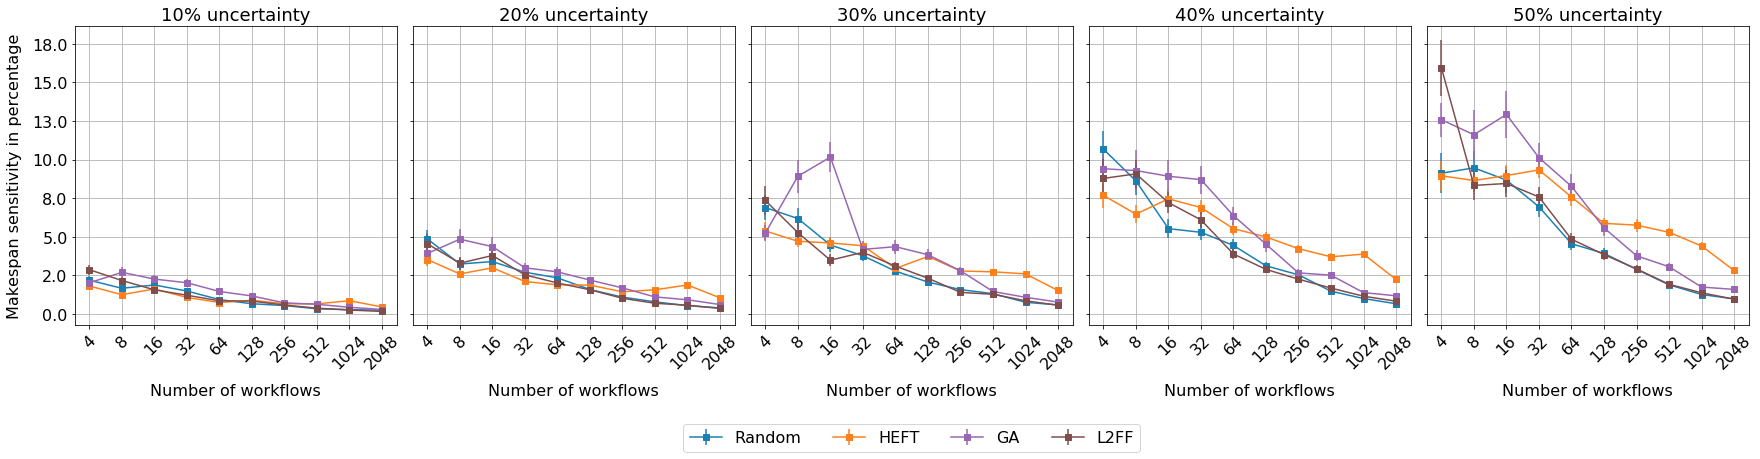

In [19]:
HEFTx = np.array([StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_10perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_20perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_30perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_40perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_50perc.mean().index.values.tolist()])

HEFTy = np.array([StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_10perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_20perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_30perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_40perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_50perc.mean()['mpn_snt_norm'].values.tolist()])

HEFTyStd = np.array([StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_10perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_20perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_30perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_40perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_50perc.std()['mpn_snt_norm'].values.tolist()])

L2FFx = np.array([StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_10perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_20perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_30perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_40perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_50perc.mean().index.values.tolist()])

L2FFy = np.array([StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_10perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_20perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_30perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_40perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_50perc.mean()['mpn_snt_norm'].values.tolist()])

L2FFyStd = np.array([StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_10perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_20perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_30perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_40perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesL2FF_inaccur_50perc.std()['mpn_snt_norm'].values.tolist()])

GA50x = np.array([StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_10perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_20perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_30perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_40perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_50perc.mean().index.values.tolist()])

GA50y = np.array([StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_10perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_20perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_30perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_40perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_50perc.mean()['mpn_snt_norm'].values.tolist()])

GA50yStd = np.array([StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_10perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_20perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_30perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_40perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesGA50_inaccur_50perc.std()['mpn_snt_norm'].values.tolist()])

RANDx = np.array([StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_10perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_20perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_30perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_40perc.mean().index.values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_50perc.mean().index.values.tolist()])

RANDy = np.array([StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_10perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_20perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_30perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_40perc.mean()['mpn_snt_norm'].values.tolist(),
                  StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_50perc.mean()['mpn_snt_norm'].values.tolist()])

RANDyStd = np.array([StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_10perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_20perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_30perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_40perc.std()['mpn_snt_norm'].values.tolist(),
                     StHeteroCampaigns_4DynHeteroResourcesRAND_inaccur_50perc.std()['mpn_snt_norm'].values.tolist()])

#z = np.array([[10],
#     [20],
#     [30],
#     [40],
#     [50]])

fig, axis = plt.subplots(ncols=5, nrows=1, figsize=(30,5.5), sharey=True, sharex=True)
#axis = fig.add_subplot(111, projection='3d')
_ = axis[0].errorbar(RANDx[0], RANDy[0], yerr=RANDyStd[0] / 10, label='Random', color=tableau20(0), marker='s')
_ = axis[1].errorbar(RANDx[1], RANDy[1], yerr=RANDyStd[1] / 10, label='Random', color=tableau20(0), marker='s')
_ = axis[2].errorbar(RANDx[2], RANDy[2], yerr=RANDyStd[2] / 10, label='Random', color=tableau20(0), marker='s')
_ = axis[3].errorbar(RANDx[3], RANDy[3], yerr=RANDyStd[3] / 10, label='Random', color=tableau20(0), marker='s')
_ = axis[4].errorbar(RANDx[4], RANDy[4], yerr=RANDyStd[4] / 10, label='Random', color=tableau20(0), marker='s')

_ = axis[0].errorbar(HEFTx[0], HEFTy[0], yerr=HEFTyStd[0] / 10, label='HEFT', color=tableau20(2), marker='s')
_ = axis[1].errorbar(HEFTx[1], HEFTy[1], yerr=HEFTyStd[1] / 10, label='HEFT', color=tableau20(2), marker='s')
_ = axis[2].errorbar(HEFTx[2], HEFTy[2], yerr=HEFTyStd[2] / 10, label='HEFT', color=tableau20(2), marker='s')
_ = axis[3].errorbar(HEFTx[3], HEFTy[3], yerr=HEFTyStd[3] / 10, label='HEFT', color=tableau20(2), marker='s')
_ = axis[4].errorbar(HEFTx[4], HEFTy[4], yerr=HEFTyStd[4] / 10, label='HEFT', color=tableau20(2), marker='s')

_ = axis[0].errorbar(GA50x[0], GA50y[0], yerr=GA50yStd[0] / 10, label='GA', color=tableau20(8), marker='s')
_ = axis[1].errorbar(GA50x[1], GA50y[1], yerr=GA50yStd[1] / 10, label='GA', color=tableau20(8), marker='s')
_ = axis[2].errorbar(GA50x[2], GA50y[2], yerr=GA50yStd[2] / 10, label='GA', color=tableau20(8), marker='s')
_ = axis[3].errorbar(GA50x[3], GA50y[3], yerr=GA50yStd[3] / 10, label='GA', color=tableau20(8), marker='s')
_ = axis[4].errorbar(GA50x[4], GA50y[4], yerr=GA50yStd[4] / 10, label='GA', color=tableau20(8), marker='s')

_ = axis[0].errorbar(L2FFx[0], L2FFy[0], yerr=L2FFyStd[0] / 10, label='L2FF', color=tableau20(10), marker='s')
_ = axis[1].errorbar(L2FFx[1], L2FFy[1], yerr=L2FFyStd[1] / 10, label='L2FF', color=tableau20(10), marker='s')
_ = axis[2].errorbar(L2FFx[2], L2FFy[2], yerr=L2FFyStd[2] / 10, label='L2FF', color=tableau20(10), marker='s')
_ = axis[3].errorbar(L2FFx[3], L2FFy[3], yerr=L2FFyStd[3] / 10, label='L2FF', color=tableau20(10), marker='s')
_ = axis[4].errorbar(L2FFx[4], L2FFy[4], yerr=L2FFyStd[4] / 10, label='L2FF', color=tableau20(10), marker='s')
#_ = axis.plot_wireframe(GA50x,z,GA50y, color=tableau20(8), label='GA-50')
#_ = axis.plot_wireframe(L2FFx,z,L2FFy, color=tableau20(10),label='L2FF')
_ = axis[0].set_xlabel('Number of workflows', fontsize=16, labelpad=12)
_ = axis[1].set_xlabel('Number of workflows', fontsize=16, labelpad=12)
_ = axis[2].set_xlabel('Number of workflows', fontsize=16, labelpad=12)
_ = axis[3].set_xlabel('Number of workflows', fontsize=16, labelpad=12)
_ = axis[4].set_xlabel('Number of workflows', fontsize=16, labelpad=12)
#_ = axis[2,3].set_xlabel('Number of workflows', fontsize=16, labelpad=12)
#_ = axis[2,4].set_xlabel('Number of workflows', fontsize=16, labelpad=12)
#_ = axis.set_ylabel('Uncertainty in percentage', fontsize=16, labelpad=10)
#_ = axis[0,0].set_ylabel('HEFT Normalized Sensitivity', fontsize=16, labelpad=10)
#_ = axis[1,0].set_ylabel('GA50 Normalized Sensitivity', fontsize=16, labelpad=10)
_ = axis[0].set_ylabel('Makespan sensitivity in percentage', fontsize=16, labelpad=10)
#_ = axis[1].set_ylabel('Makespan sensitivity in percentage', fontsize=16, labelpad=10)
#_ = axis[2].set_ylabel('Makespan sensitivity in percentage', fontsize=16, labelpad=10)
#_ = axis[3].set_ylabel('Makespan sensitivity in percentage', fontsize=16, labelpad=10)
#_ = axis[4].set_ylabel('Makespan sensitivity in percentage', fontsize=16, labelpad=10)
_ = axis[2].legend(fontsize=16, loc='lower center', ncol=4, bbox_to_anchor=(.5,-.45))
_ = axis[0].set_xscale('symlog', basex=2)
#_ = axis.set_xticks([4,8,16,32,64,128,256,1024])
#_ = axis.set_yticks([10,20,30,40,50])
_ = axis[0].grid('on')
#_ = axis[0,1].grid('on')
#_ = axis[0,2].grid('on')
#_ = axis[0,3].grid('on')
#_ = axis[0,4].grid('on')

#_ = axis[1,0].grid('on')
#_ = axis[1,1].grid('on')
#_ = axis[1,2].grid('on')
#_ = axis[1,3].grid('on')
#_ = axis[1,4].grid('on')

#_ = axis[2,0].grid('on')
#_ = axis[2,1].grid('on')
#_ = axis[2,2].grid('on')
#_ = axis[2,3].grid('on')
#_ = axis[2,4].grid('on')
_ = axis[0].grid('on', which='both')
_ = axis[1].grid('on', which='both')
_ = axis[2].grid('on', which='both')
_ = axis[3].grid('on', which='both')
_ = axis[4].grid('on', which='both')
_ = axis[0].set_title('10% uncertainty', fontsize=18)
_ = axis[1].set_title('20% uncertainty', fontsize=18)
_ = axis[2].set_title('30% uncertainty', fontsize=18)
_ = axis[3].set_title('40% uncertainty', fontsize=18)
_ = axis[4].set_title('50% uncertainty', fontsize=18)
#_ = axis[0,3].set_title('40% uncertainty', fontsize=18)
#_ = axis[0,4].set_title('50% uncertainty', fontsize=18)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,1].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,2].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,3].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,4].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=16, rotation=45)
_ = axis[1].set_xticklabels(axis[1].get_xticks().astype('int').tolist(),fontsize=16, rotation=45)
_ = axis[2].set_xticklabels(axis[2].get_xticks().astype('int').tolist(),fontsize=16, rotation=45)
_ = axis[3].set_xticklabels(axis[3].get_xticks().astype('int').tolist(),fontsize=16, rotation=45)
_ = axis[4].set_xticklabels(axis[4].get_xticks().astype('int').tolist(),fontsize=16, rotation=45)
_ = axis[0].set_yticklabels(np.around(axis[0].get_yticks() * 100, decimals=0),fontsize=16)
_ = axis[1].set_yticklabels(np.around(axis[1].get_yticks() * 100, decimals=0),fontsize=16)
_ = axis[2].set_yticklabels(np.around(axis[2].get_yticks() * 100, decimals=0),fontsize=16)
_ = axis[3].set_yticklabels(np.around(axis[3].get_yticks() * 100, decimals=0),fontsize=16)
_ = axis[4].set_yticklabels(np.around(axis[4].get_yticks() * 100, decimals=0),fontsize=16)
#_ = axis[1,0].set_yticklabels(np.around(axis[0,0].get_yticks().tolist(), decimals=2),fontsize=16)
#_ = axis[2,0].set_yticklabels(np.around(axis[0,0].get_yticks().tolist(), decimals=2),fontsize=16)
#_ = fig.tight_layout()
#_ = axis.set_zticklabels(np.around(axis.get_zticks().tolist(), decimals=2),fontsize=16)
_ = fig.subplots_adjust(wspace=0.05)
#_ = fig.savefig('../Figures/InaccurStHeteroCampaigns_4StHeteroResourcesSens.png', bbox_inches='tight')
#_ = fig.savefig('../Figures/InaccurStHeteroCampaigns_4StHeteroResourcesSens.pdf', bbox_inches='tight')

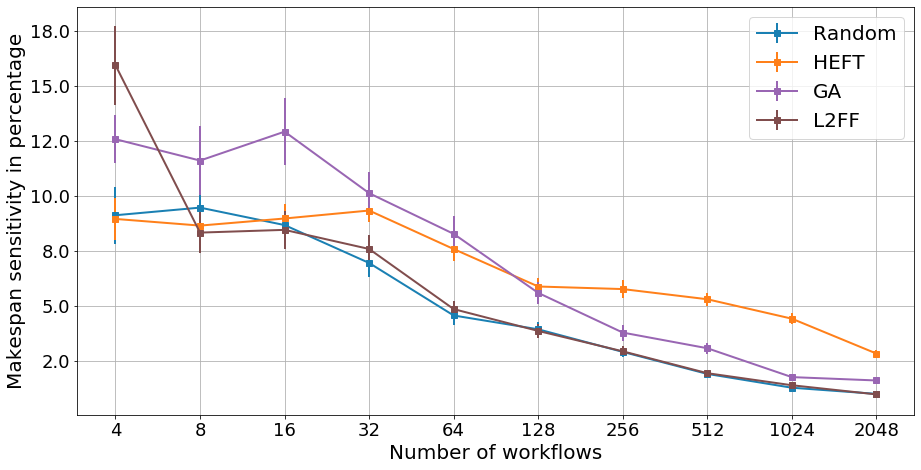

In [20]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(RANDx[4], RANDy[4], yerr=RANDyStd[4] / 10, label='Random', color=tableau20(0), marker='s',linewidth=2)
_ = axis.errorbar(HEFTx[4], HEFTy[4], yerr=HEFTyStd[4] / 10, label='HEFT', color=tableau20(2), marker='s',linewidth=2)
_ = axis.errorbar(GA50x[4], GA50y[4], yerr=GA50yStd[4] / 10, label='GA', color=tableau20(8), marker='s',linewidth=2)
_ = axis.errorbar(L2FFx[4], L2FFy[4], yerr=L2FFyStd[4] / 10, label='L2FF', color=tableau20(10), marker='s',linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
#_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
#_ = axis.set_yticks([0.01,0.1])
_ = axis.set_ylabel('Makespan sensitivity in percentage',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(np.around(axis.get_yticks() * 100, decimals=0),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
#_ = fig.savefig('../Figures/Experiment2/DynHeteroResources_StHeteroCampaignsSens.pdf',bbox_inches='tight')
_ = fig.savefig('../Figures/Experiment3/InaccurStHeteroCampaigns_4StHeteroResourcesSens50.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

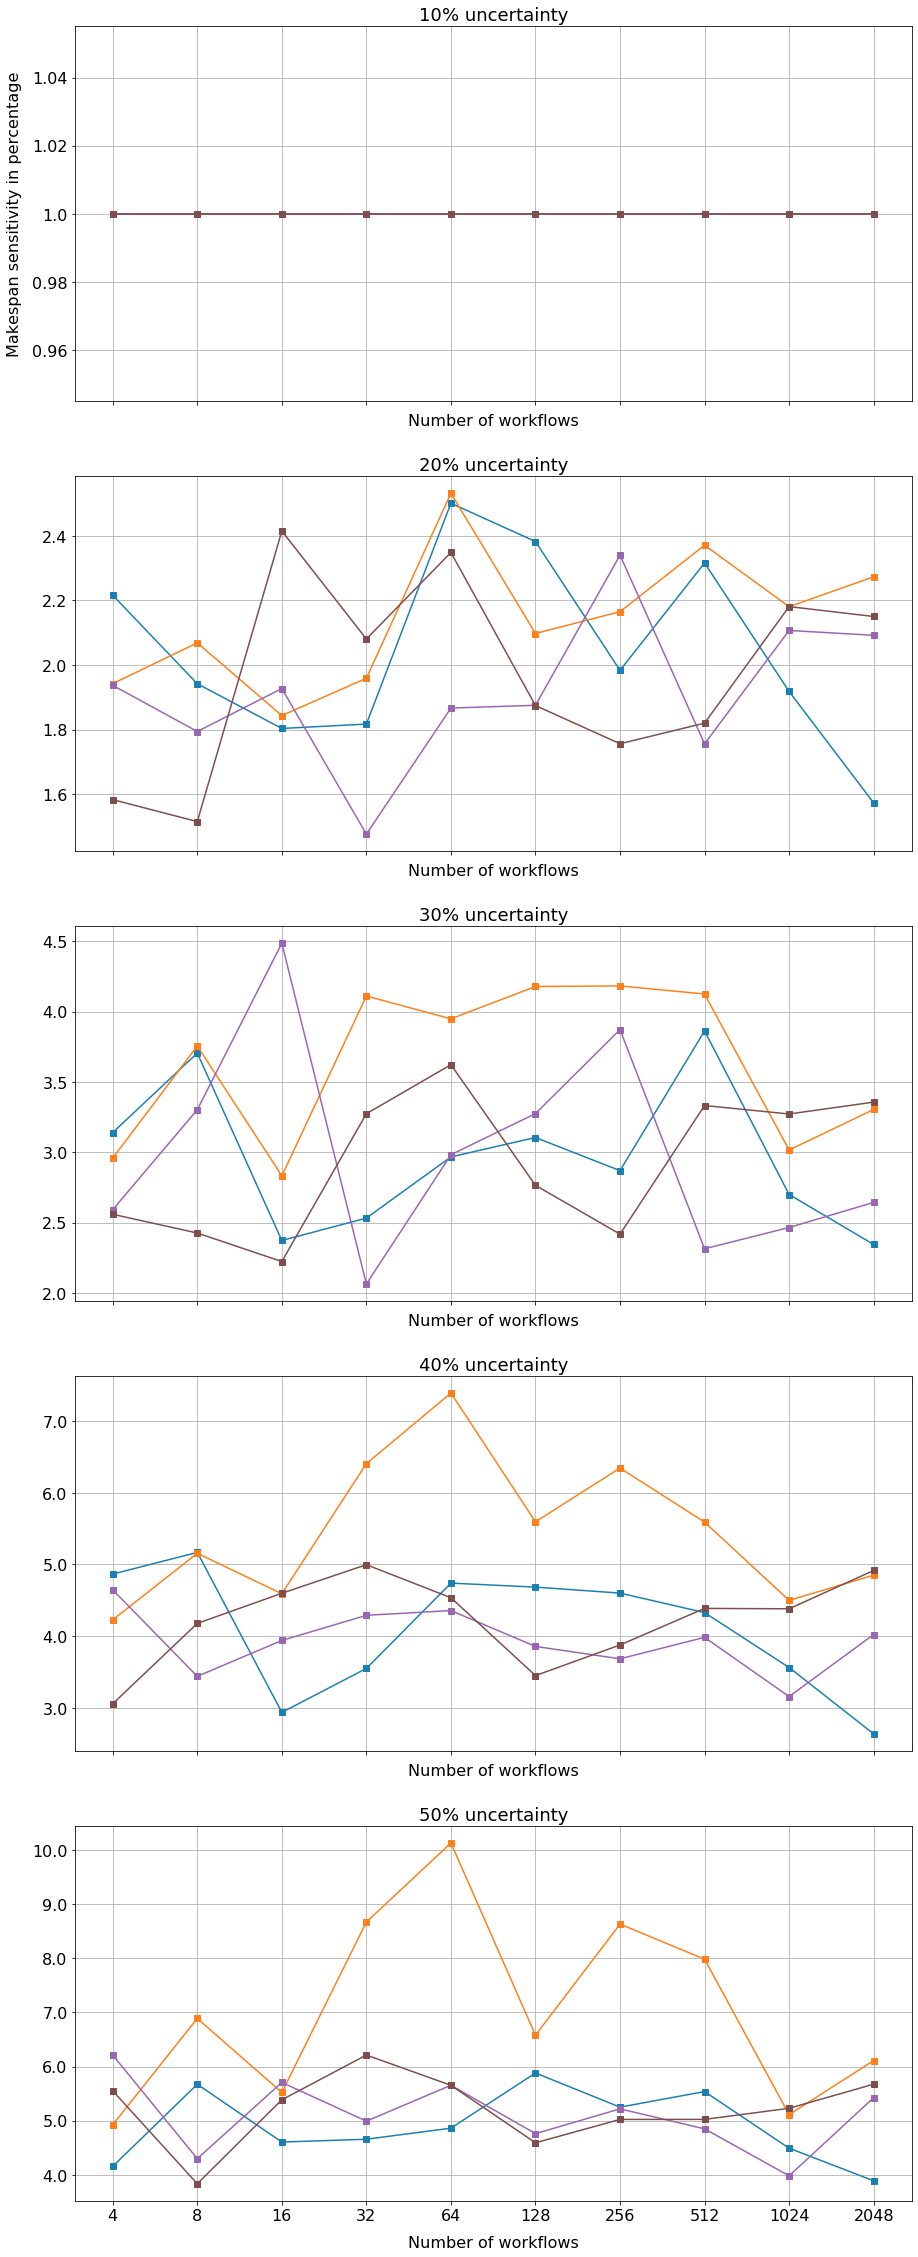

In [10]:
fig, axis = plt.subplots(ncols=1, nrows=5, figsize=(15,40), sharey=False, sharex=True)
#axis = fig.add_subplot(111, projection='3d')
_ = axis[0].errorbar(RANDx[0], RANDy[0] / RANDy[0], label='Random', color=tableau20(0), marker='s')
_ = axis[1].errorbar(RANDx[1], RANDy[1] / RANDy[0], label='Random', color=tableau20(0), marker='s')
_ = axis[2].errorbar(RANDx[2], RANDy[2] / RANDy[0], label='Random', color=tableau20(0), marker='s')
_ = axis[3].errorbar(RANDx[3], RANDy[3] / RANDy[0], label='Random', color=tableau20(0), marker='s')
_ = axis[4].errorbar(RANDx[4], RANDy[4] / RANDy[0], label='Random', color=tableau20(0), marker='s')

_ = axis[0].errorbar(HEFTx[0], HEFTy[0] / HEFTy[0], label='HEFT', color=tableau20(2), marker='s')
_ = axis[1].errorbar(HEFTx[1], HEFTy[1] / HEFTy[0], label='HEFT', color=tableau20(2), marker='s')
_ = axis[2].errorbar(HEFTx[2], HEFTy[2] / HEFTy[0], label='HEFT', color=tableau20(2), marker='s')
_ = axis[3].errorbar(HEFTx[3], HEFTy[3] / HEFTy[0], label='HEFT', color=tableau20(2), marker='s')
_ = axis[4].errorbar(HEFTx[4], HEFTy[4] / HEFTy[0], label='HEFT', color=tableau20(2), marker='s')

_ = axis[0].errorbar(GA50x[0], GA50y[0] / GA50y[0], label='GA-50', color=tableau20(8), marker='s')
_ = axis[1].errorbar(GA50x[1], GA50y[1] / GA50y[0], label='GA-50', color=tableau20(8), marker='s')
_ = axis[2].errorbar(GA50x[2], GA50y[2] / GA50y[0], label='GA-50', color=tableau20(8), marker='s')
_ = axis[3].errorbar(GA50x[3], GA50y[3] / GA50y[0], label='GA-50', color=tableau20(8), marker='s')
_ = axis[4].errorbar(GA50x[4], GA50y[4] / GA50y[0], label='GA-50', color=tableau20(8), marker='s')

_ = axis[0].errorbar(L2FFx[0], L2FFy[0] / L2FFy[0], label='L2FF', color=tableau20(10), marker='s')
_ = axis[1].errorbar(L2FFx[1], L2FFy[1] / L2FFy[0], label='L2FF', color=tableau20(10), marker='s')
_ = axis[2].errorbar(L2FFx[2], L2FFy[2] / L2FFy[0], label='L2FF', color=tableau20(10), marker='s')
_ = axis[3].errorbar(L2FFx[3], L2FFy[3] / L2FFy[0], label='L2FF', color=tableau20(10), marker='s')
_ = axis[4].errorbar(L2FFx[4], L2FFy[4] / L2FFy[0], label='L2FF', color=tableau20(10), marker='s')
#_ = axis.plot_wireframe(GA50x,z,GA50y, color=tableau20(8), label='GA-50')
#_ = axis.plot_wireframe(L2FFx,z,L2FFy, color=tableau20(10),label='L2FF')
_ = axis[0].set_xlabel('Number of workflows', fontsize=16, labelpad=12)
_ = axis[1].set_xlabel('Number of workflows', fontsize=16, labelpad=12)
_ = axis[2].set_xlabel('Number of workflows', fontsize=16, labelpad=12)
_ = axis[3].set_xlabel('Number of workflows', fontsize=16, labelpad=12)
_ = axis[4].set_xlabel('Number of workflows', fontsize=16, labelpad=12)
#_ = axis[2,3].set_xlabel('Number of workflows', fontsize=16, labelpad=12)
#_ = axis[2,4].set_xlabel('Number of workflows', fontsize=16, labelpad=12)
#_ = axis.set_ylabel('Uncertainty in percentage', fontsize=16, labelpad=10)
#_ = axis[0,0].set_ylabel('HEFT Normalized Sensitivity', fontsize=16, labelpad=10)
#_ = axis[1,0].set_ylabel('GA50 Normalized Sensitivity', fontsize=16, labelpad=10)
_ = axis[0].set_ylabel('Makespan sensitivity in percentage', fontsize=16, labelpad=10)
_ = axis[2].legend(fontsize=16, loc='lower center', ncol=4, bbox_to_anchor=(.5,-.35))
_ = axis[0].set_xscale('symlog', basex=2)
#_ = axis.set_xticks([4,8,16,32,64,128,256,1024])
#_ = axis.set_yticks([10,20,30,40,50])
_ = axis[0].grid('on')
#_ = axis[0,1].grid('on')
#_ = axis[0,2].grid('on')
#_ = axis[0,3].grid('on')
#_ = axis[0,4].grid('on')

#_ = axis[1,0].grid('on')
#_ = axis[1,1].grid('on')
#_ = axis[1,2].grid('on')
#_ = axis[1,3].grid('on')
#_ = axis[1,4].grid('on')

#_ = axis[2,0].grid('on')
#_ = axis[2,1].grid('on')
#_ = axis[2,2].grid('on')
#_ = axis[2,3].grid('on')
#_ = axis[2,4].grid('on')
_ = axis[0].grid('on', which='both')
_ = axis[1].grid('on', which='both')
_ = axis[2].grid('on', which='both')
_ = axis[3].grid('on', which='both')
_ = axis[4].grid('on', which='both')
_ = axis[0].set_title('10% uncertainty', fontsize=18)
_ = axis[1].set_title('20% uncertainty', fontsize=18)
_ = axis[2].set_title('30% uncertainty', fontsize=18)
_ = axis[3].set_title('40% uncertainty', fontsize=18)
_ = axis[4].set_title('50% uncertainty', fontsize=18)
#_ = axis[0,3].set_title('40% uncertainty', fontsize=18)
#_ = axis[0,4].set_title('50% uncertainty', fontsize=18)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,1].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,2].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,3].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,4].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[1].set_xticklabels(axis[1].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[2].set_xticklabels(axis[2].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[3].set_xticklabels(axis[3].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[4].set_xticklabels(axis[4].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[0].set_yticklabels(np.around(axis[0].get_yticks(), decimals=2),fontsize=16)
_ = axis[1].set_yticklabels(np.around(axis[1].get_yticks(), decimals=2),fontsize=16)
_ = axis[2].set_yticklabels(np.around(axis[2].get_yticks(), decimals=2),fontsize=16)
_ = axis[3].set_yticklabels(np.around(axis[3].get_yticks(), decimals=2),fontsize=16)
_ = axis[4].set_yticklabels(np.around(axis[4].get_yticks(), decimals=2),fontsize=16)
#_ = axis[1,0].set_yticklabels(np.around(axis[0,0].get_yticks().tolist(), decimals=2),fontsize=16)
#_ = axis[2,0].set_yticklabels(np.around(axis[0,0].get_yticks().tolist(), decimals=2),fontsize=16)
#_ = fig.tight_layout()
#_ = axis.set_zticklabels(np.around(axis.get_zticks().tolist(), decimals=2),fontsize=16)
_ = fig.subplots_adjust(wspace=0.05)
#_ = fig.savefig('../Figures/InaccurStHeteroCampaigns_4StHeteroResourcesSens.png', bbox_inches='tight')
#_ = fig.savefig('../Figures/InaccurStHeteroCampaigns_4StHeteroResourcesSens.pdf', bbox_inches='tight')

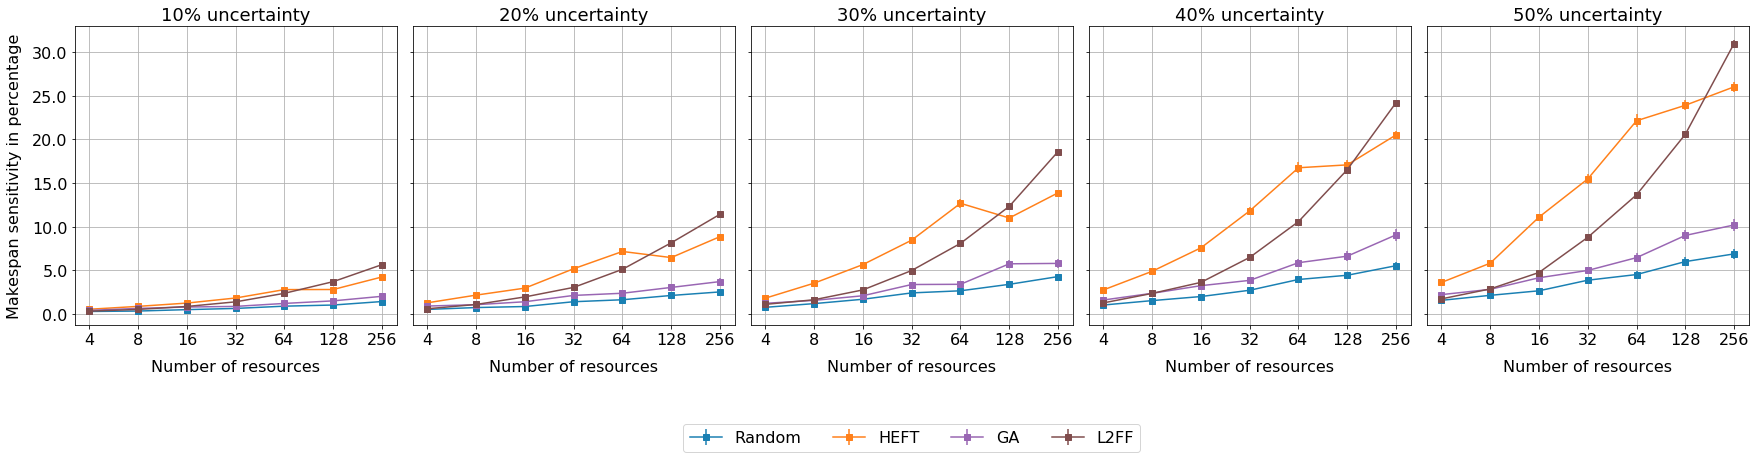

In [21]:
HEFTx = np.array([DynHeteroResources_StHeteroCampaignsHEFT_inaccur_10perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsHEFT_inaccur_20perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsHEFT_inaccur_30perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsHEFT_inaccur_40perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsHEFT_inaccur_50perc.mean().index.values.tolist()])

HEFTy = np.array([DynHeteroResources_StHeteroCampaignsHEFT_inaccur_10perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsHEFT_inaccur_20perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsHEFT_inaccur_30perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsHEFT_inaccur_40perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsHEFT_inaccur_50perc.mean()['mpn_snt_norm'].values.tolist()])

HEFTyStd = np.array([DynHeteroResources_StHeteroCampaignsHEFT_inaccur_10perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsHEFT_inaccur_20perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsHEFT_inaccur_30perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsHEFT_inaccur_40perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsHEFT_inaccur_50perc.std()['mpn_snt_norm'].values.tolist()])

L2FFx = np.array([DynHeteroResources_StHeteroCampaignsL2FF_inaccur_10perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsL2FF_inaccur_20perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsL2FF_inaccur_30perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsL2FF_inaccur_40perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsL2FF_inaccur_50perc.mean().index.values.tolist()])

L2FFy = np.array([DynHeteroResources_StHeteroCampaignsL2FF_inaccur_10perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsL2FF_inaccur_20perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsL2FF_inaccur_30perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsL2FF_inaccur_40perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsL2FF_inaccur_50perc.mean()['mpn_snt_norm'].values.tolist()])

L2FFyStd = np.array([DynHeteroResources_StHeteroCampaignsL2FF_inaccur_10perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsL2FF_inaccur_20perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsL2FF_inaccur_30perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsL2FF_inaccur_40perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsL2FF_inaccur_50perc.std()['mpn_snt_norm'].values.tolist()])

GA50x = np.array([DynHeteroResources_StHeteroCampaignsGA50_inaccur_10perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsGA50_inaccur_20perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsGA50_inaccur_30perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsGA50_inaccur_40perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsGA50_inaccur_50perc.mean().index.values.tolist()])

GA50y = np.array([DynHeteroResources_StHeteroCampaignsGA50_inaccur_10perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsGA50_inaccur_20perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsGA50_inaccur_30perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsGA50_inaccur_40perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsGA50_inaccur_50perc.mean()['mpn_snt_norm'].values.tolist()])

GA50yStd = np.array([DynHeteroResources_StHeteroCampaignsGA50_inaccur_10perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsGA50_inaccur_20perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsGA50_inaccur_30perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsGA50_inaccur_40perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsGA50_inaccur_50perc.std()['mpn_snt_norm'].values.tolist()])

RANDx = np.array([DynHeteroResources_StHeteroCampaignsRAND_inaccur_10perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsRAND_inaccur_20perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsRAND_inaccur_30perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsRAND_inaccur_40perc.mean().index.values.tolist(),
                  DynHeteroResources_StHeteroCampaignsRAND_inaccur_50perc.mean().index.values.tolist()])

RANDy = np.array([DynHeteroResources_StHeteroCampaignsRAND_inaccur_10perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsRAND_inaccur_20perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsRAND_inaccur_30perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsRAND_inaccur_40perc.mean()['mpn_snt_norm'].values.tolist(),
                  DynHeteroResources_StHeteroCampaignsRAND_inaccur_50perc.mean()['mpn_snt_norm'].values.tolist()])

RANDyStd = np.array([DynHeteroResources_StHeteroCampaignsRAND_inaccur_10perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsRAND_inaccur_20perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsRAND_inaccur_30perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsRAND_inaccur_40perc.std()['mpn_snt_norm'].values.tolist(),
                     DynHeteroResources_StHeteroCampaignsRAND_inaccur_50perc.std()['mpn_snt_norm'].values.tolist()])


fig, axis = plt.subplots(ncols=5, nrows=1, figsize=(30,5.5), sharey=True, sharex=True)
#axis = fig.add_subplot(111, projection='3d')
_ = axis[0].errorbar(RANDx[0], RANDy[0], yerr=RANDyStd[0] / 10, label='Random', color=tableau20(0), marker='s')
_ = axis[1].errorbar(RANDx[1], RANDy[1], yerr=RANDyStd[1] / 10, label='Random', color=tableau20(0), marker='s')
_ = axis[2].errorbar(RANDx[2], RANDy[2], yerr=RANDyStd[2] / 10, label='Random', color=tableau20(0), marker='s')
_ = axis[3].errorbar(RANDx[3], RANDy[3], yerr=RANDyStd[3] / 10, label='Random', color=tableau20(0), marker='s')
_ = axis[4].errorbar(RANDx[4], RANDy[4], yerr=RANDyStd[4] / 10, label='Random', color=tableau20(0), marker='s')

_ = axis[0].errorbar(HEFTx[0], HEFTy[0], yerr=HEFTyStd[0] / 10, label='HEFT', color=tableau20(2), marker='s')
_ = axis[1].errorbar(HEFTx[1], HEFTy[1], yerr=HEFTyStd[1] / 10, label='HEFT', color=tableau20(2), marker='s')
_ = axis[2].errorbar(HEFTx[2], HEFTy[2], yerr=HEFTyStd[2] / 10, label='HEFT', color=tableau20(2), marker='s')
_ = axis[3].errorbar(HEFTx[3], HEFTy[3], yerr=HEFTyStd[3] / 10, label='HEFT', color=tableau20(2), marker='s')
_ = axis[4].errorbar(HEFTx[4], HEFTy[4], yerr=HEFTyStd[4] / 10, label='HEFT', color=tableau20(2), marker='s')

_ = axis[0].errorbar(GA50x[0], GA50y[0], yerr=GA50yStd[0] / 10, label='GA', color=tableau20(8), marker='s')
_ = axis[1].errorbar(GA50x[1], GA50y[1], yerr=GA50yStd[1] / 10, label='GA', color=tableau20(8), marker='s')
_ = axis[2].errorbar(GA50x[2], GA50y[2], yerr=GA50yStd[2] / 10, label='GA', color=tableau20(8), marker='s')
_ = axis[3].errorbar(GA50x[3], GA50y[3], yerr=GA50yStd[3] / 10, label='GA', color=tableau20(8), marker='s')
_ = axis[4].errorbar(GA50x[4], GA50y[4], yerr=GA50yStd[4] / 10, label='GA', color=tableau20(8), marker='s')

_ = axis[0].errorbar(L2FFx[0], L2FFy[0], yerr=L2FFyStd[0] / 10, label='L2FF', color=tableau20(10), marker='s')
_ = axis[1].errorbar(L2FFx[1], L2FFy[1], yerr=L2FFyStd[1] / 10, label='L2FF', color=tableau20(10), marker='s')
_ = axis[2].errorbar(L2FFx[2], L2FFy[2], yerr=L2FFyStd[2] / 10, label='L2FF', color=tableau20(10), marker='s')
_ = axis[3].errorbar(L2FFx[3], L2FFy[3], yerr=L2FFyStd[3] / 10, label='L2FF', color=tableau20(10), marker='s')
_ = axis[4].errorbar(L2FFx[4], L2FFy[4], yerr=L2FFyStd[4] / 10, label='L2FF', color=tableau20(10), marker='s')
#_ = axis.plot_wireframe(GA50x,z,GA50y, color=tableau20(8), label='GA-50')
#_ = axis.plot_wireframe(L2FFx,z,L2FFy, color=tableau20(10),label='L2FF')
_ = axis[0].set_xlabel('Number of resources', fontsize=16, labelpad=12)
_ = axis[1].set_xlabel('Number of resources', fontsize=16, labelpad=12)
_ = axis[2].set_xlabel('Number of resources', fontsize=16, labelpad=12)
_ = axis[3].set_xlabel('Number of resources', fontsize=16, labelpad=12)
_ = axis[4].set_xlabel('Number of resources', fontsize=16, labelpad=12)
#_ = axis[2,3].set_xlabel('Number of resources', fontsize=16, labelpad=12)
#_ = axis[2,4].set_xlabel('Number of resources', fontsize=16, labelpad=12)
#_ = axis.set_ylabel('Uncertainty in percentage', fontsize=16, labelpad=10)
_ = axis[0].set_ylabel('Makespan sensitivity in percentage', fontsize=16, labelpad=10)
#_ = axis[1,0].set_ylabel('GA50 Normalized Sensitivity', fontsize=16, labelpad=10)
#_ = axis[2,0].set_ylabel('L2FF Normalized Sensitivity', fontsize=16, labelpad=10)
_ = axis[2].legend(fontsize=16, loc='lower center', ncol=4, bbox_to_anchor=(.5,-.45))
_ = axis[0].set_xscale('symlog', basex=2)
#_ = axis.set_xticks([4,8,16,32,64,128,256,1024])
#_ = axis.set_yticks([10,20,30,40,50])
#_ = axis[0,0].grid('on')
#_ = axis[0,1].grid('on')
#_ = axis[0,2].grid('on')
#_ = axis[0,3].grid('on')
#_ = axis[0,4].grid('on')

#_ = axis[1,0].grid('on')
#_ = axis[1,1].grid('on')
#_ = axis[1,2].grid('on')
#_ = axis[1,3].grid('on')
#_ = axis[1,4].grid('on')

#_ = axis[2,0].grid('on')
#_ = axis[2,1].grid('on')
#_ = axis[2,2].grid('on')
#_ = axis[2,3].grid('on')
#_ = axis[2,4].grid('on')
_ = axis[0].grid('on', which='both')
_ = axis[1].grid('on', which='both')
_ = axis[2].grid('on', which='both')
_ = axis[3].grid('on', which='both')
_ = axis[4].grid('on', which='both')
_ = axis[0].set_title('10% uncertainty', fontsize=18)
_ = axis[1].set_title('20% uncertainty', fontsize=18)
_ = axis[2].set_title('30% uncertainty', fontsize=18)
_ = axis[3].set_title('40% uncertainty', fontsize=18)
_ = axis[4].set_title('50% uncertainty', fontsize=18)
#_ = axis[0,3].set_title('40% uncertainty', fontsize=18)
#_ = axis[0,4].set_title('50% uncertainty', fontsize=18)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,1].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,2].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,3].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,4].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[1].set_xticklabels(axis[1].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[2].set_xticklabels(axis[2].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[3].set_xticklabels(axis[3].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[4].set_xticklabels(axis[4].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[0].set_yticklabels(np.around(axis[0].get_yticks() * 100, decimals=0),fontsize=16)
_ = axis[1].set_yticklabels(np.around(axis[1].get_yticks() * 100, decimals=0),fontsize=16)
_ = axis[2].set_yticklabels(np.around(axis[2].get_yticks() * 100, decimals=0),fontsize=16)
_ = axis[3].set_yticklabels(np.around(axis[3].get_yticks() * 100, decimals=0),fontsize=16)
_ = axis[4].set_yticklabels(np.around(axis[4].get_yticks() * 100, decimals=0),fontsize=16)
#_ = axis[1,0].set_yticklabels(np.around(axis[0,0].get_yticks().tolist(), decimals=2),fontsize=16)
#_ = axis[2,0].set_yticklabels(np.around(axis[0,0].get_yticks().tolist(), decimals=2),fontsize=16)
#_ = fig.tight_layout()
#_ = axis.set_zticklabels(np.around(axis.get_zticks().tolist(), decimals=2),fontsize=16)
_ = fig.subplots_adjust(wspace=0.05)
#_ = fig.savefig('../Figures/InaccurStHeteroResources_StHeteroCampaignsSens.png', bbox_inches='tight')
#_ = fig.savefig('../Figures/InaccurStHeteroResources_StHeteroCampaignsSens.pdf', bbox_inches='tight')

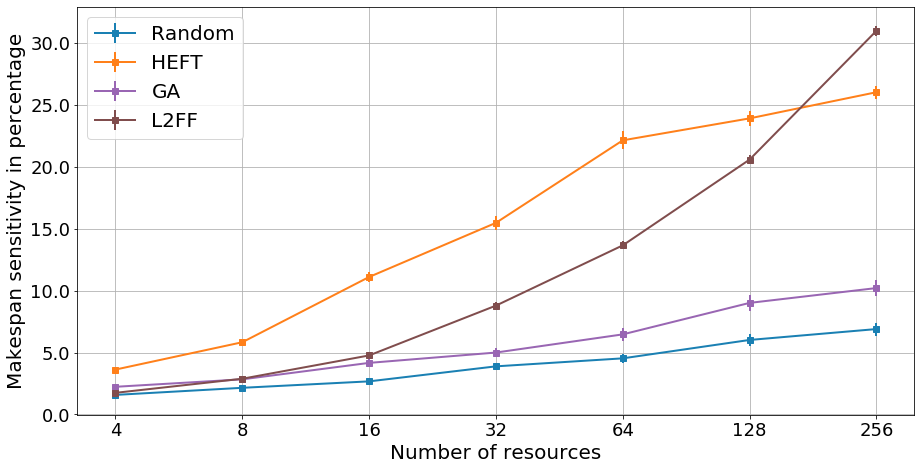

In [22]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(RANDx[4], RANDy[4], yerr=RANDyStd[4] / 10, label='Random', color=tableau20(0), marker='s',linewidth=2)
_ = axis.errorbar(HEFTx[4], HEFTy[4], yerr=HEFTyStd[4] / 10, label='HEFT', color=tableau20(2), marker='s',linewidth=2)
_ = axis.errorbar(GA50x[4], GA50y[4], yerr=GA50yStd[4] / 10, label='GA', color=tableau20(8), marker='s',linewidth=2)
_ = axis.errorbar(L2FFx[4], L2FFy[4], yerr=L2FFyStd[4] / 10, label='L2FF', color=tableau20(10), marker='s',linewidth=2)
# _ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
#_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog',basex=2)
#_ = axis.set_yticks([0.01,0.1])
_ = axis.set_ylabel('Makespan sensitivity in percentage',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(np.around(axis.get_yticks() * 100, decimals=0),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
#_ = fig.savefig('../Figures/Experiment2/DynHeteroResources_StHeteroCampaignsSens.pdf',bbox_inches='tight')
_ = fig.savefig('../Figures/Experiment3/InaccurStHeteroResources_StHeteroCampaignsSens50.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

In [ ]:
fig, axis = plt.subplots(ncols=1, nrows=5, figsize=(15,40), sharey=False, sharex=True)
#axis = fig.add_subplot(111, projection='3d')
_ = axis[0].errorbar(RANDx[0], RANDy[0] / RANDy[0], label='Random', color=tableau20(0), marker='s')
_ = axis[1].errorbar(RANDx[1], RANDy[1] / RANDy[0], label='Random', color=tableau20(0), marker='s')
_ = axis[2].errorbar(RANDx[2], RANDy[2] / RANDy[0], label='Random', color=tableau20(0), marker='s')
_ = axis[3].errorbar(RANDx[3], RANDy[3] / RANDy[0], label='Random', color=tableau20(0), marker='s')
_ = axis[4].errorbar(RANDx[4], RANDy[4] / RANDy[0], label='Random', color=tableau20(0), marker='s')

_ = axis[0].errorbar(HEFTx[0], HEFTy[0] / HEFTy[0], label='HEFT', color=tableau20(2), marker='s')
_ = axis[1].errorbar(HEFTx[1], HEFTy[1] / HEFTy[0], label='HEFT', color=tableau20(2), marker='s')
_ = axis[2].errorbar(HEFTx[2], HEFTy[2] / HEFTy[0], label='HEFT', color=tableau20(2), marker='s')
_ = axis[3].errorbar(HEFTx[3], HEFTy[3] / HEFTy[0], label='HEFT', color=tableau20(2), marker='s')
_ = axis[4].errorbar(HEFTx[4], HEFTy[4] / HEFTy[0], label='HEFT', color=tableau20(2), marker='s')

_ = axis[0].errorbar(GA50x[0], GA50y[0] / GA50y[0], label='GA-50', color=tableau20(8), marker='s')
_ = axis[1].errorbar(GA50x[1], GA50y[1] / GA50y[0], label='GA-50', color=tableau20(8), marker='s')
_ = axis[2].errorbar(GA50x[2], GA50y[2] / GA50y[0], label='GA-50', color=tableau20(8), marker='s')
_ = axis[3].errorbar(GA50x[3], GA50y[3] / GA50y[0], label='GA-50', color=tableau20(8), marker='s')
_ = axis[4].errorbar(GA50x[4], GA50y[4] / GA50y[0], label='GA-50', color=tableau20(8), marker='s')

_ = axis[0].errorbar(L2FFx[0], L2FFy[0] / L2FFy[0], label='L2FF', color=tableau20(10), marker='s')
_ = axis[1].errorbar(L2FFx[1], L2FFy[1] / L2FFy[0], label='L2FF', color=tableau20(10), marker='s')
_ = axis[2].errorbar(L2FFx[2], L2FFy[2] / L2FFy[0], label='L2FF', color=tableau20(10), marker='s')
_ = axis[3].errorbar(L2FFx[3], L2FFy[3] / L2FFy[0], label='L2FF', color=tableau20(10), marker='s')
_ = axis[4].errorbar(L2FFx[4], L2FFy[4] / L2FFy[0], label='L2FF', color=tableau20(10), marker='s')
#_ = axis.plot_wireframe(GA50x,z,GA50y, color=tableau20(8), label='GA-50')
#_ = axis.plot_wireframe(L2FFx,z,L2FFy, color=tableau20(10),label='L2FF')
_ = axis[0].set_xlabel('Number of resources', fontsize=16, labelpad=12)
_ = axis[1].set_xlabel('Number of resources', fontsize=16, labelpad=12)
_ = axis[2].set_xlabel('Number of resources', fontsize=16, labelpad=12)
_ = axis[3].set_xlabel('Number of resources', fontsize=16, labelpad=12)
_ = axis[4].set_xlabel('Number of resources', fontsize=16, labelpad=12)
#_ = axis[2,3].set_xlabel('Number of resources', fontsize=16, labelpad=12)
#_ = axis[2,4].set_xlabel('Number of resources', fontsize=16, labelpad=12)
#_ = axis.set_ylabel('Uncertainty in percentage', fontsize=16, labelpad=10)
_ = axis[0].set_ylabel('Makespan sensitivity in percentage', fontsize=16, labelpad=10)
#_ = axis[1,0].set_ylabel('GA50 Normalized Sensitivity', fontsize=16, labelpad=10)
#_ = axis[2,0].set_ylabel('L2FF Normalized Sensitivity', fontsize=16, labelpad=10)
_ = axis[2].legend(fontsize=16, loc='lower center', ncol=4, bbox_to_anchor=(.5,-.35))
_ = axis[0].set_xscale('symlog', basex=2)
#_ = axis.set_xticks([4,8,16,32,64,128,256,1024])
#_ = axis.set_yticks([10,20,30,40,50])
#_ = axis[0,0].grid('on')
#_ = axis[0,1].grid('on')
#_ = axis[0,2].grid('on')
#_ = axis[0,3].grid('on')
#_ = axis[0,4].grid('on')

#_ = axis[1,0].grid('on')
#_ = axis[1,1].grid('on')
#_ = axis[1,2].grid('on')
#_ = axis[1,3].grid('on')
#_ = axis[1,4].grid('on')

#_ = axis[2,0].grid('on')
#_ = axis[2,1].grid('on')
#_ = axis[2,2].grid('on')
#_ = axis[2,3].grid('on')
#_ = axis[2,4].grid('on')
_ = axis[0].grid('on', which='both')
_ = axis[1].grid('on', which='both')
_ = axis[2].grid('on', which='both')
_ = axis[3].grid('on', which='both')
_ = axis[4].grid('on', which='both')
_ = axis[0].set_title('10% uncertainty', fontsize=18)
_ = axis[1].set_title('20% uncertainty', fontsize=18)
_ = axis[2].set_title('30% uncertainty', fontsize=18)
_ = axis[3].set_title('40% uncertainty', fontsize=18)
_ = axis[4].set_title('50% uncertainty', fontsize=18)
#_ = axis[0,3].set_title('40% uncertainty', fontsize=18)
#_ = axis[0,4].set_title('50% uncertainty', fontsize=18)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,1].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,2].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,3].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,4].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[1].set_xticklabels(axis[1].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[2].set_xticklabels(axis[2].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[3].set_xticklabels(axis[3].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[4].set_xticklabels(axis[4].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis[0].set_yticklabels(np.around(axis[0].get_yticks(), decimals=2),fontsize=16)
_ = axis[1].set_yticklabels(np.around(axis[1].get_yticks(), decimals=2),fontsize=16)
_ = axis[2].set_yticklabels(np.around(axis[2].get_yticks(), decimals=2),fontsize=16)
_ = axis[3].set_yticklabels(np.around(axis[3].get_yticks(), decimals=2),fontsize=16)
_ = axis[4].set_yticklabels(np.around(axis[4].get_yticks(), decimals=2),fontsize=16)
#_ = axis[1,0].set_yticklabels(np.around(axis[0,0].get_yticks().tolist(), decimals=2),fontsize=16)
#_ = axis[2,0].set_yticklabels(np.around(axis[0,0].get_yticks().tolist(), decimals=2),fontsize=16)
#_ = fig.tight_layout()
#_ = axis.set_zticklabels(np.around(axis.get_zticks().tolist(), decimals=2),fontsize=16)
_ = fig.subplots_adjust(wspace=0.05)
#_ = fig.savefig('../Figures/InaccurStHeteroResources_StHeteroCampaignsSens.png', bbox_inches='tight')
#_ = fig.savefig('../Figures/InaccurStHeteroResources_StHeteroCampaignsSens.pdf', bbox_inches='tight')

In [ ]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(15,7.5), sharey=False, sharex=True)
#axis = fig.add_subplot(111, projection='3d')
_ = axis.errorbar(RANDx[2], RANDy[2] / RANDy[0], label='Random', color=tableau20(0), marker='s')
_ = axis.errorbar(HEFTx[2], HEFTy[2] / HEFTy[0], label='HEFT', color=tableau20(2), marker='s')
_ = axis.errorbar(GA50x[2], GA50y[2] / GA50y[0], label='GA-50', color=tableau20(8), marker='s')
_ = axis.errorbar(L2FFx[2], L2FFy[2] / L2FFy[0], label='L2FF', color=tableau20(10), marker='s')
#_ = axis.plot_wireframe(GA50x,z,GA50y, color=tableau20(8), label='GA-50')
#_ = axis.plot_wireframe(L2FFx,z,L2FFy, color=tableau20(10),label='L2FF')
_ = axis.set_xlabel('Number of resources', fontsize=16, labelpad=12)
#_ = axis[2,3].set_xlabel('Number of resources', fontsize=16, labelpad=12)
#_ = axis[2,4].set_xlabel('Number of resources', fontsize=16, labelpad=12)
#_ = axis.set_ylabel('Uncertainty in percentage', fontsize=16, labelpad=10)
_ = axis.set_ylabel('Sensitivity factor compared to 10% uncertainty', fontsize=16, labelpad=10)
#_ = axis[1,0].set_ylabel('GA50 Normalized Sensitivity', fontsize=16, labelpad=10)
#_ = axis[2,0].set_ylabel('L2FF Normalized Sensitivity', fontsize=16, labelpad=10)
_ = axis.legend(fontsize=16)
_ = axis.set_xscale('symlog', basex=2)
#_ = axis.set_xticks([4,8,16,32,64,128,256,1024])
#_ = axis.set_yticks([10,20,30,40,50])
#_ = axis[0,0].grid('on')
#_ = axis[0,1].grid('on')
#_ = axis[0,2].grid('on')
#_ = axis[0,3].grid('on')
#_ = axis[0,4].grid('on')

#_ = axis[1,0].grid('on')
#_ = axis[1,1].grid('on')
#_ = axis[1,2].grid('on')
#_ = axis[1,3].grid('on')
#_ = axis[1,4].grid('on')

#_ = axis[2,0].grid('on')
#_ = axis[2,1].grid('on')
#_ = axis[2,2].grid('on')
#_ = axis[2,3].grid('on')
#_ = axis[2,4].grid('on')
_ = axis.grid('on', which='both')
#_ = axis.set_title('30% uncertainty', fontsize=18)
#_ = axis[0,3].set_title('40% uncertainty', fontsize=18)
#_ = axis[0,4].set_title('50% uncertainty', fontsize=18)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,1].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,2].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,3].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
#_ = axis[2,4].set_xticklabels(axis[0,0].get_xticks().astype('int').tolist(),fontsize=16)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=16)
_ = axis.set_yticklabels(np.around(axis.get_yticks(), decimals=2),fontsize=16)
#_ = axis[1,0].set_yticklabels(np.around(axis[0,0].get_yticks().tolist(), decimals=2),fontsize=16)
#_ = axis[2,0].set_yticklabels(np.around(axis[0,0].get_yticks().tolist(), decimals=2),fontsize=16)
#_ = fig.tight_layout()
#_ = axis.set_zticklabels(np.around(axis.get_zticks().tolist(), decimals=2),fontsize=16)
#_ = fig.savefig('../Figures/InaccurStHeteroResources_StHeteroCampaignsSens.png', bbox_inches='tight')
_ = fig.savefig('../Figures/InaccurStHeteroResources_StHeteroCampaignsSensFactor.pdf', bbox_inches='tight')